In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
#from keras.utils import np_utils
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Conv2D, MaxPooling2D,Dropout,MaxPooling1D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv("D:/project/DRDO/ML_gui_v2/Ashok@49yr_2-9-22_MI_LH.csv")
dataset

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,label,EMG
0,105,-29,-137,15,90,20,-122,112,22,-11,...,39,-128,43,85,-5,-112,127,-14,cylindrical,EMG1
1,-29,-76,79,10,-59,-25,89,32,-121,73,...,-100,95,2,-33,-49,84,44,-131,cylindrical,EMG1
2,21,97,-5,-117,124,-8,-34,-65,81,27,...,-8,-27,-76,79,15,-61,-26,90,cylindrical,EMG1
3,34,-122,68,36,-14,-105,100,-3,-34,-51,...,-115,122,-9,-37,-65,81,27,-93,cylindrical,EMG1
4,-11,94,18,-121,109,11,-26,-89,87,8,...,59,-13,-109,109,-4,-38,-56,83,cylindrical,EMG1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-85,-68,100,45,-100,-9,112,-13,-120,55,...,126,-82,-106,102,58,-111,-20,123,tip,EMG3
536,2,-126,47,127,-78,-114,99,68,-112,-27,...,46,-114,-8,124,-21,-133,65,123,tip,EMG3
537,-90,-86,109,52,-113,-14,125,-12,-129,62,...,-31,-134,84,100,-108,-43,113,32,tip,EMG3
538,-119,1,135,-22,-142,89,88,-83,-56,93,...,-100,-15,118,-21,-135,56,130,-89,tip,EMG3


In [3]:
dataset_features_ch1 =  dataset[dataset['EMG'] == 'EMG1']

In [4]:
dataset_features_ch1.shape

(180, 1002)

In [5]:
dataset_labels = dataset_features_ch1['label']
dataset_features = dataset_features_ch1.drop(columns=['label','EMG'],axis=1)
dataset_features.shape

(180, 1000)

In [6]:
encoder = LabelEncoder()
encoder.fit(dataset_labels)
encoded_Y = encoder.transform(dataset_labels)
y = np_utils.to_categorical(encoded_Y)
y.shape

(180, 6)

In [7]:
x = np.array(dataset_features[:])
x = x.reshape(x.shape[0],x.shape[1],1)
x.shape

(180, 1000, 1)

In [8]:
x = np.asarray(x).astype(np.float32)

In [9]:
from tensorflow import keras

In [10]:
kfold = KFold(n_splits=3, shuffle=True)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
print(x.shape, y.shape)

(180, 1000, 1) (180, 6)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 996, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 996, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 498, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 31872)             0         
                                                                 
 dense (Dense)               (None, 100)               3187300   
                                                        

In [13]:
Results = {'accuracy':[], 'loss':[], 'val_accuracy':[], 'val_loss':[]}

In [14]:
fold_no = 1
for train, test in kfold.split(x, y):
    print('------------------------------------------------------------------------')
    print(f"Training for fold {fold_no} ...")
    history = model.fit(x[train], y[train], epochs=100, batch_size=100, verbose=1, validation_data= (x[test], y[test]))
    # Increase fold number
    fold_no = fold_no + 1
    #Results = appendHist(Results, history)
    #Results_Acc = Results_Acc.append(history.history['accuracy'])
    Results['accuracy'].append(history.history['accuracy'])
    Results['loss'].append(history.history['loss'])
    Results['val_accuracy'].append(history.history['val_accuracy'])
    Results['val_loss'].append(history.history['val_loss'])

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
2/2 [==============================] - 1s 333ms/step - loss: 67.2289 - accuracy: 0.1917 - val_loss: 505.5414 - val_accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 0s 82ms/step - loss: 538.3733 - accuracy: 0.1667 - val_loss: 321.4580 - val_accuracy: 0.1500
Epoch 3/100
2/2 [==============================] - 0s 79ms/step - loss: 345.0778 - accuracy: 0.1750 - val_loss: 208.2091 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 0s 79ms/step - loss: 218.6787 - accuracy: 0.1500 - val_loss: 95.0685 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 0s 77ms/step - loss: 97.3978 - accuracy: 0.1500 - val_loss: 49.2612 - val_accuracy: 0.2000
Epoch 6/100
2/2 [==============================] - 0s 77ms/step - loss: 47.2021 - accuracy: 0.1583 - val_loss: 14.8344 - val_accuracy: 0.2167
Epoch 7/100
2/2 [===========================

In [15]:
A = Results['accuracy']
B = Results['val_accuracy']
C = Results['loss']
D = Results['val_loss']

In [16]:
#Ac = np.array([A[0], A[1], A[2]])
TrainAcc = np.concatenate((A[0], A[1],A[2]), axis=0)
TestAcc = np.concatenate((B[0], B[1],B[2]), axis=0)
Trainloss = np.concatenate((C[0], C[1],C[2]), axis=0)
Testloss = np.concatenate((D[0], D[1],D[2]), axis=0)

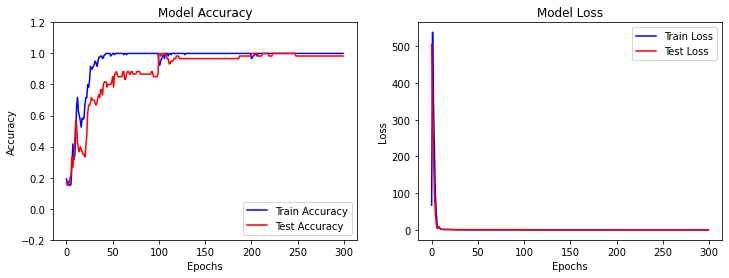

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Model Accuracy and Loss')
fig.set_figheight(4)
fig.set_figwidth(12)
ax1.plot(TrainAcc,'b')
ax1.plot(TestAcc,'r-')
ax1.set_ylim(-0.2, 1.2)
ax1.set_title('Model Accuracy')
ax1.set(xlabel='Epochs',ylabel='Accuracy')
ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
ax2.plot(Trainloss,'b')
ax2.plot(Testloss,'r-')
#ax2.set_ylim(-0.2, 1.2)
ax2.set_title('Model Loss')
ax2.set(xlabel='Epochs',ylabel='Loss')
#plt.ylabel('Accuracy')

ax2.legend(['Train Loss', 'Test Loss'], loc='upper right')

In [18]:
# Evaluate the model
loss, acc = model.evaluate(x, y, verbose=2)
print("Model Accuracy: {:5.2f}%".format(100 * acc))


6/6 - 0s - loss: 0.0055 - accuracy: 0.9944 - 81ms/epoch - 14ms/step
Model Accuracy: 99.44%


In [19]:
model.save('model1_30_5.h5')

In [20]:
import tensorflow as tf

In [21]:
direct = os.getcwd()
Model_Fname = direct+'\model1_30_5'
print(Model_Fname)

C:\Users\Karthik\Drdo\model1_30_5


In [22]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="D:/project/DRDO/ML_gui_v2/ashok.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# data
data = """-114	123	-27	9	-66	78	52	-126	-24	95	19	-116	122	-30	9	-66	77	52	-125	-24	93	21	-114	123	-27	9	-67	79	52	-125	-29	94	17	-115	122	-26	9	-66	77	52	-125	-25	94	17	-115	122	-26	11	-60	79	54	-126	-23	94	17	-114	121	-23	6	-66	78	57	-126	-23	94	19	-114	121	-26	8	-65	79	55	-125	-23	95	18	-114	122	-28	9	-66	79	52	-124	-22	93	18	-114	117	-31	8	-66	79	57	-125	-24	94	18	-115	118	-30	9	-65	78	56	-126	-27	93	17	-113	123	-26	7	-65	80	54	-125	-24	94	19	-114	119	-33	10	-60	79	54	-126	-23	94	21	-114	119	-29	9	-66	78	54	-125	-23	94	18	-114	122	-25	9	-60	80	54	-127	-29	94	16	-114	122	-27	9	-59	80	52	-125	-23	93	19	-114	124	-28	10	-57	79	55	-125	-27	93	17	-114	121	-24	8	-58	80	56	-125	-23	95	18	-113	122	-25	7	-63	79	56	-126	-28	93	19	-115	119	-30	8	-65	78	54	-126	-28	93	17	-114	122	-26	7	-66	77	58	-126	-23	95	20	-113	118	-30	9	-66	79	54	-127	-22	93	22	-114	123	-25	10	-58	79	52	-126	-23	93	18	-114	120	-25	8	-59	79	54	-126	-23	95	19	-113	121	-24	8	-59	80	54	-126	-23	93	18	-114	122	-24	7	-64	79	55	-126	-29	93	18	-113	119	-30	9	-65	78	56	-125	-27	93	16	-113	122	-25	8	-59	79	52	-126	-27	93	19	-113	122	-29	10	-61	79	54	-126	-28	93	19	-112	122	-32	10	-59	79	55	-127	-26	93	19	-114	122	-31	8	-61	80	52	-126	-25	92	23	-114	121	-33	10	-61	78	51	-126	-27	92	20	-114	121	-31	9	-61	79	53	-127	-26	93	20	-113	122	-29	10	-61	78	51	-127	-26	93	21	-113	120	-29	8	-66	78	56	-128	-26	93	19	-115	121	-30	8	-66	78	53	-128	-27	93	21	-113	121	-30	9	-62	79	51	-128	-22	93	22	-115	124	-24	9	-67	78	51	-118	-27	94	21	-115	121	-30	10	-66	78	56	-125	-28	93	17	-114	124	-27	8	-67	78	56	-127	-27	94	16	-114	123	-25	7	-67	78	56	-127	-27	93	18	-114	123	-27	8	-66	78	54	-127	-22	94	20	-114	120	-29	10	-65	78	56	-126	-23	93	22	-113	120	-24	10	-58	81	53	-124	-22	95	16	-114	121	-24	8	-65	80	55	-125	-22	94	18	-113	121	-26	8	-64	78	57	-127	-27	94	16	-113	121	-24	6	-64	79	53	-124	-23	94	17	-113	117	-28	8	-59	80	55	-124	-22	94	19	-114	120	-27	7	-66	79	56	-127	-22	93	19	-114	120	-27	8	-60	80	55	-125	-21	94	18	-114	120	-29	8	-59	80	54	-126	-20	95	18	-114	120	-28	7	-60	80	54	-126	-20	95	18	-115	121	-29	7	-59	80	53	-127	-25	93	16	-114	126	-23	5	-66	80	56	-126	-21	94	18	-114	120	-30	11	-57	78	68	-128	-17	93	15	-119	125	-43	5	-65	85	61	-128	-22	92	20	-114	120	-30	1	-64	83	69	-130	-20	97	25	-114	123	-30	3	-65	81	59	-130	-20	94	20	-114	126	-22	6	-66	83	61	-132	-18	94	18	-116	125	-22	5	-63	79	56	-130	-24	96	18	-92	130	-21	5	-66	81	55	-130	-20	94	20	-115	124	-23	5	-66	75	60	-127	-20	90	17	-116	125	-22	7	-67	78	58	-130	-20	95	19	-117	125	-22	6	-66	79	59	-129	-20	96	16	-115	123	-20	5	-65	81	58	-129	-20	96	17	-114	123	-18	6	-67	79	58	-128	-20	95	16	-115	124	-20	6	-66	78	59	-127	-20	96	19	-115	124	-23	6	-66	78	58	-126	-22	95	18	-115	122	-24	8	-66	79	57	-126	-23	95	19	-114	123	-26	8	-69	77	55	-127	-23	95	19	-115	124	-27	8	-67	78	56	-126	-24	94	18	-115	122	-25	8	-67	77	57	-126	-23	96	17	-114	122	-26	8	-66	77	57	-125	-24	95	18	-115	123	-26	9	-66	78	57	-125	-24	95	18	-114	122	-26	7	-65	78	59	-124	-24	95	18	-114	119	-25	7	-65	78	58	-124	-24	94	16	-114	120	-25	6	-64	78	59	-124	-23	94	16	-113	122	-25	7	-63	78	58	-124	-23	95	13	-112	118	-24	5	-62	79	59	-123	-22	95	15	-113	119	-25	5	-61	79	58	-124	-24	94	18	-113	121	-25	7	-64	78	57	-125	-24	95	17	-113	118	-25	6	-62	79	60	-123	-22	95	17	-114	120	-27	6	-63	79	57	-123	-23	95	18	-113	120	-27	7	-64	79	58	-123	-24	95	20	-114	121	-28	8	-65	79	58	-124	-23	94	20	-113	123	-27	7	-65	78	58	-125	-24	96	20	-114	122	-28	7	-66	78	58	-126	-22	94	23	-114	123	-29	9	-67	77	56	-125	-25	94	25	-114	123	-31	10	-67	77	56	-125	-25	93	24	-114	122	-30	8	-66	77	57	-125	-24	93	25	-114	122	-30	9	-68	76	54	-118	-27	93	29	-114	123	-32	13	-69	77	57	-125	-26	93
"""
# Split the data into individual values and convert them into a list
data_values = [int(val) for val in data.split()]

data_list = data.split()
input_data = np.array([data_values], dtype=np.float32)
# print(input_data.reshape(1,1000,1).shape)
input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()



[{'name': 'serving_default_conv1d_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [23]:
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
tflite_model_predictions

array([[3.3570605e-06, 5.6491872e-06, 9.9998164e-01, 5.0606942e-13,
        9.4361531e-06, 1.8628328e-10]], dtype=float32)

In [24]:
predicted_label_index = np.argmax(tflite_model_predictions)
predicted_label_index

2

In [25]:
actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]

predicted_label = actions[predicted_label_index]
predicted_label

'lateral'

In [26]:
# import tensorflow as tf
# import numpy as np

# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_path="D:/project/DRDO/ML_gui_v2/ashok.tflite")
# interpreter.allocate_tensors()

# # Get input and output details
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()
# input_shape = (1,1000,1)
# output_shape = (1,6)
# print(input_details)

# interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
# interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
# interpreter.allocate_tensors()
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Data for input 1
# data1 = """-29	-76	79	10	-59	-25	89	32	-121	73	32	-17	-104	101	-8	-39	-50	83	35	-130	43	94	-5	-113	126	-10	-53	-70	77	21	-81	-10	90	22	-121	112	7	-18	-89	88	2	-36	-41	87	38	-128	46	79	0	-110	118	-15	-36	-64	78	24	-105	0	90	13	-120	131	-2	-23	-80	84	1	-42	-40	74	34	-123	52	70	-11	-108	118	-12	-36	-55	82	20	-113	12	91	-3	-121	132	-7	-29	-76	75	5	-54	-29	87	34	-122	67	49	-14	-105	108	-12	-41	-53	80	34	-132	22	94	-2	-115	130	-15	-34	-72	79	13	-68	-23	89	26	-121	87	26	-19	-100	96	-6	-38	-46	83	36	-131	34	95	-7	-112	127	-15	-35	-69	77	15	-74	-15	91	23	-120	99	23	-21	-97	96	-7	-37	-48	84	37	-132	31	93	-6	-115	127	-13	-33	-69	76	16	-73	-17	93	26	-120	101	18	-19	-95	96	-7	-38	-48	82	37	-132	29	95	-7	-112	126	-17	-36	-68	79	14	-75	-17	89	20	-122	98	21	-18	-96	95	-7	-35	-47	83	36	-130	35	95	-5	-111	128	-18	-33	-70	78	11	-67	-20	89	25	-121	89	22	-19	-101	95	-8	-38	-46	82	36	-130	35	95	-5	-112	125	-17	-34	-68	77	18	-77	-18	92	23	-121	96	20	-17	-98	94	-2	-34	-50	83	45	-132	21	88	-2	-117	121	-10	-31	-70	78	32	-85	-20	95	30	-124	89	19	-13	-100	91	8	-32	-48	87	51	-131	16	86	2	-119	122	-5	-28	-69	81	36	-87	-21	96	30	-123	85	19	-13	-100	92	10	-32	-47	88	52	-130	21	79	0	-118	118	-4	-31	-67	80	36	-91	-20	97	28	-123	94	18	-14	-99	93	8	-31	-49	87	52	-130	17	85	0	-118	122	-5	-30	-69	81	34	-87	-19	96	25	-123	98	18	-15	-97	92	4	-33	-49	86	46	-131	19	89	-4	-116	122	-8	-33	-68	80	29	-89	-18	94	23	-121	98	20	-16	-97	94	2	-34	-50	85	45	-131	19	91	-5	-116	124	-8	-34	-67	81	28	-88	-20	94	23	-122	98	21	-15	-96	92	3	-33	-49	85	46	-131	22	88	-5	-114	122	-9	-34	-67	80	28	-89	-19	93	22	-121	101	20	-17	-95	94	3	-36	-46	85	43	-129	25	87	-7	-115	120	-8	-34	-66	80	28	-92	-18	94	21	-122	104	16	-19	-92	90	5	-39	-40	87	44	-127	32	85	-6	-115	121	-8	-35	-67	81	29	-96	-10	95	16	-122	114	8	-20	-90	86	9	-43	-39	88	44	-127	37	76	-7	-114	117	-7	-34	-65	81	34	-100	-10	97	14	-123	120	3	-20	-86	84	15	-44	-35	90	46	-126	37	64	-5	-114	111	-3	-32	-62	83	42	-115	-10	98	14	-124	131	0	-21	-81	82	24	-52	-33	93	46	-126	44	54	-4	-114	109	1	-32	-64	83	46	-117	-8	99	13	-124	126	2	-21	-84	82	23	-52	-32	93	46	-125	45	53	-5	-113	108	0	-29	-63	83	46	-120	-4	99	10	-123	132	0	-21	-79	82	21	-54	-32	92	43	-124	49	54	-7	-112	109	-3	-34	-59	82	41	-123	1	97	6	-121	133	-5	-26	-78	81	17	-57	-29	90	38	-122	61	42	-11	-107	102	-2	-37	-54	83	42	-135	12	97	-2	-118	129	-8	-30	-71	79	20	-71	-23	91	29	-123	81	30	-17	-102	97	0	-36	-51	83	42	-132	21	97	-6	-116	126	-9	-34	-69	80	23	-81	-18	94	23	-122	100	24	-18	-97	94	1	-37	-47	85	41	-131	24	90	-7	-114	122	-10	-36	-66	80	28	-99	-5	95	15	-120	119	7	-22	-89	86	7	-41	-38	87	42	-127	41	77	-9	-114	117	-10	-36	-62	80	31	-107	-1	95	8	-121	125	3	-23	-83	85	11	-48	-32	90	38	-125	50	60	-10	-109	109	-8	-37	-58	82	35	-121	9	96	4	-120	133	-4	-27	-79	80	14	-55	-29	90	38	-124	54	52	-11	-110	107	-3	-36	-57	82	38	-127	9	96	2	-120	134	-4	-27	-78	80	16	-58	-29	89	37	-122	62	44	-13	-107	104	-2	-38	-53	85	41	-135	15	97	-4	-117	128	-9	-31	-72	79	21	-74	-20	92	28	-122	85	25	-17	-101	96	1	-37	-47	86	43	-132	23	91	-6	-116	123	-7	-35	-67	80	27	-88	-16	94	21	-121	100	22	-19	-96	93	3	-37	-45	85	42	-131	26	87	-6	-115	121	-8	-35	-67	81	28	-94	-11	94	17	-122	114	9	-21	-90	86	8	-43	-38	87	42	-127	41	74	-8	-113	116	-6	-35	-64	81	32	-107	-1	95	9	-122	126	1	-24	-84	83	11	-46	-34	89	40	-125	49	60	-10	-111	111	-5	-36	-60	82	36	-119	4	96	6	-122	133	-3	-27	-79	82	12	-57	-26	89	39	-121	54	55	-13	-108	104	-3	-36	-60	81	20	-135	14	99	6	-140	125	-6	-29	-73	80	19	-65	-27	91	34	-122	70	40	-11	-109	102	0	-37	-52	84	42	-134	16	98	-2	-119	128	-8	-30	-71	79	22	-75	-21	93	28	-122	85	27	-17	-100	95	2	-33	-49	84	44	-131
# """
# data1_values = [int(val) for val in data1.split()]

# # Data for input 2
# data2 = """21	97	-5	-117	124	-8	-34	-65	81	27	-90	-16	94	20	-122	107	16	-21	-93	89	8	-40	-41	87	43	-128	36	82	-7	-114	119	-8	-35	-62	81	30	-105	-6	96	13	-122	130	3	-23	-83	84	10	-44	-35	89	42	-125	46	64	-9	-112	111	-5	-37	-58	82	36	-120	1	96	8	-122	135	-1	-25	-80	82	14	-54	-32	90	39	-124	54	55	-10	-109	108	-4	-36	-56	82	40	-134	9	96	2	-120	132	-7	-28	-75	81	17	-65	-27	89	36	-122	67	41	-14	-106	101	0	-36	-53	83	42	-135	14	96	-2	-117	129	-8	-31	-71	79	21	-74	-23	92	30	-122	83	32	-18	-101	98	0	-38	-49	85	42	-134	19	96	-6	-116	127	-9	-35	-67	80	25	-87	-21	92	23	-123	99	23	-15	-97	96	0	-37	-48	84	44	-132	21	97	-6	-115	125	-9	-36	-67	80	26	-92	-17	93	22	-122	112	12	-19	-89	89	6	-41	-41	87	43	-127	36	81	-7	-114	118	-7	-37	-61	80	31	-105	-4	95	13	-122	134	1	-24	-83	83	10	-44	-34	87	42	-126	47	64	-9	-112	112	-6	-38	-59	82	35	-119	3	96	8	-122	135	-2	-25	-79	82	12	-49	-32	89	39	-125	53	56	-9	-111	110	-4	-37	-57	82	37	-122	7	97	5	-121	134	-3	-27	-77	81	15	-55	-30	90	37	-122	64	45	-9	-108	107	-4	-37	-55	82	38	-126	7	95	4	-119	133	-5	-27	-75	80	17	-59	-28	90	37	-122	65	46	-11	-107	105	-4	-38	-55	83	41	-130	13	96	0	-117	129	-8	-33	-72	79	21	-70	-23	91	31	-121	81	29	-15	-101	96	0	-36	-49	85	42	-132	21	91	-5	-115	123	-9	-35	-66	79	26	-83	-16	93	22	-121	104	18	-18	-96	92	1	-36	-46	85	45	-130	27	83	-6	-114	119	-9	-36	-64	81	29	-98	-6	95	16	-121	116	5	-21	-87	85	10	-43	-35	88	43	-126	42	68	-7	-113	114	-8	-34	-62	80	34	-106	-2	95	10	-121	130	-1	-25	-81	82	12	-50	-30	90	40	-125	52	53	-9	-111	108	-6	-35	-58	81	37	-119	4	95	6	-123	133	-4	-26	-78	81	14	-55	-28	89	38	-122	57	45	-10	-108	106	-4	-37	-54	83	40	-130	10	97	1	-119	131	-8	-30	-74	79	16	-64	-24	91	33	-122	72	30	-12	-103	97	-2	-34	-49	85	42	-133	21	91	-3	-116	124	-13	-32	-68	79	24	-81	-17	93	23	-122	100	19	-17	-96	93	0	-35	-45	85	43	-130	27	85	-5	-115	120	-11	-35	-65	80	28	-96	-7	95	18	-121	111	7	-20	-90	86	7	-41	-37	87	42	-127	40	74	-7	-112	117	-9	-35	-63	79	29	-101	-2	95	12	-121	126	-2	-25	-82	81	12	-50	-26	91	37	-123	61	42	-11	-107	104	-3	-38	-53	83	38	-134	16	96	-1	-116	129	-9	-32	-71	78	18	-70	-21	92	30	-121	77	27	-16	-102	96	-1	-38	-48	84	40	-133	23	91	-5	-115	123	-11	-34	-67	79	24	-88	-16	94	20	-121	102	18	-20	-96	92	1	-35	-44	85	42	-130	29	84	-5	-114	120	-11	-36	-66	80	28	-95	-6	93	16	-119	111	6	-23	-90	86	7	-41	-37	88	41	-126	39	74	-9	-113	118	-11	-36	-63	80	30	-106	0	94	11	-119	126	0	-23	-84	83	7	-43	-35	88	42	-124	42	65	-8	-112	114	-9	-35	-61	80	32	-111	0	96	10	-121	130	0	-23	-82	82	11	-45	-31	89	39	-123	51	53	-9	-111	110	-7	-32	-59	81	35	-117	3	96	7	-122	132	-3	-25	-80	81	12	-51	-28	90	37	-123	56	46	-11	-108	105	-5	-36	-55	82	39	-131	12	97	0	-118	130	-10	-30	-72	79	18	-66	-23	92	33	-121	75	28	-16	-103	96	-1	-34	-51	85	42	-133	20	96	-4	-115	124	-11	-34	-66	56	20	-80	-18	94	21	-120	103	18	-19	-95	106	2	-38	-43	83	45	-128	33	79	-3	-112	119	-13	-14	-61	80	27	-94	-5	92	17	-121	121	4	-21	-87	62	-1	-38	-37	90	38	-133	41	77	-7	-111	116	-10	-37	-60	80	33	-106	5	96	7	-122	130	-20	-26	-80	83	11	-48	-32	89	38	-123	53	54	-9	-111	111	-9	-36	-58	81	34	-115	3	95	7	-121	132	-3	-24	-79	81	11	-49	-29	90	38	-122	54	52	-10	-108	108	-6	-38	-55	80	37	-125	14	95	0	-118	130	-9	-30	-72	80	16	-64	-26	91	31	-121	77	30	-14	-102	97	-2	-38	-49	83	40	-131	22	96	-5	-115	125	-13	-33	-71	78	20	-74	-22	91	26	-120	90	21	-17	-98	95	0	-37	-48	84	41	-131	25	90	-5	-115	123	-10	-36	-67	79	25	-88	-17	93	20	-121	104	14	-20	-92	90	3	-37	-40	87	41	-126	37	80	-8	-112	117	-11	-38	-62	80	28	-103	1	95	10	-120	127	-1	-24	-81	82	9	-49	-31	88	38	-124	49	57	-10	-110	108	-6	-39	-56	82	35	-127	11	95	0	-118	131	-8	-27	-76	79	15	-61	-26	90
# """
# data2_values = [int(val) for val in data2.split()]

# # Helper function to process a set of 1000 values through the TFLite model
# def process_data(input_data):
#     input_data = np.array([input_data], dtype=np.float32)
#     interpreter.set_tensor(input_details[0]['index'], input_data)
#     interpreter.invoke()
#     return interpreter.get_tensor(output_details[0]['index'])

# # Process data1 through the TFLite model
# predictions_data1 = process_data(data1_values)

# # Process data2 through the TFLite model
# predictions_data2 = process_data(data2_values)

# # Combine the results
# combined_predictions = np.concatenate((predictions_data1, predictions_data2), axis=0)

# # Get the final predicted label
# predicted_label_index = np.argmax(combined_predictions)
# actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]
# predicted_label = actions[predicted_label_index]

# print("Predicted Label:", predicted_label)

In [19]:
numbers_with_commas= [89, -68, -71, 0, 32, 3, -56, 26, 33, -15, -46, 34, 24, -22, -42, 35, 21, -22, -35, 34, 25, -26, -37, 34, 29, -32, -33, 36, 31, -39, -22, 33, 30, -45, -12, 32, 26, -49, -3, 30, 25, -54, 2, 28, 22, -56, 9, 28, 16, -56, 16, 25, 9, -53, 19, 29, 2, -52, 25, 27, -4, -48, 28, 27, -10, -45, 30, 23, -12, -40, 34, 28, -22, -40, 37, 29, -29, -37, 36, 28, -34, -30, 36, 31, -37, -23, 31, 29, -40, -11, 31, 29, -49, -2, 30, 22, -49, 0, 30, 21, -52, 8, 27, 13, -51, 13, 29, 3, -54, 25, 29, 1, -49, 26, 26, -5, -46, 26, 29, -13, -41, 29, 27, -25, -39, 34, 25, -23, -42, 37, 30, -28, -33, 30, 31, -35, -34, 32, 31, -40, -24, 38, 31, -43, -17, 33, 28, -57, -11, 19, 29, -53, 0, 39, 19, -54, 5, 29, 17, -55, 9, 29, 7, -55, 20, 33, -4, -48, 22, 25, -6, -42, 16, 30, -18, -43, 34, 30, -17, -40, 37, 31, -27, -44, 38, 33, -33, -40, 33, 35, -38, -26, 35, 33, -47, -18, 27, 40, -55, -17, 37, 24, -56, 0, 35, 31, -53, -2, 36, 13, -56, 9, 33, 5, -61, 23, 28, 1, -60, 23, 32, 0, -55, 18, 33, -19, -42, 29, 33, -12, -50, 35, 24, -24, -47, 32, 42, -38, -41, 43, 37, -36, -30, 38, 38, -45, -16, 30, 39, -57, -17, 39, 37, -58, -1, 30, 31, -53, 2, 30, 20, -68, 5, 29, 14, -69, 23, 32, 5, -54, 24, 29, -7, -47, 28, 25, -10, -52, 39, 29, -21, -48, 43, 20, -26, -42, 36, 35, -30, -56, 37, 37, -40, -31, 40, 34, -52, -24, 31, 37, -54, -8, 32, 33, -49, -11, 25, 31, -54, -4, 39, 20, -59, 3, 32, 10, -69, 30, 33, 3, -57, 23, 33, -8, -60, 27, 26, -10, -47, 24, 27, -8, -50, 38, 30, -18, -52, 42, 32, -31, -41, 35, 34, -33, -44, 50, 34, -44, -29, 33, 36, -53, -16, 22, 28, -48, -10, 28, 24, -59, 3, 29, 29, -58, 3, 32, 30, -70, 14, 32, 10, -62, 26, 31, 6, -57, 19, 24, -5, -47, 36, 28, -17, -38, 35, 23, -20, -49, 36, 30, -22, -51, 36, 35, -38, -43, 35, 35, -39, -31, 43, 32, -49, -19, 37, 32, -55, -11, 30, 39, -61, -4, 37, 29, -62, 6, 36, 21, -58, 13, 28, 13, -59, 26, 33, -7, -54, 25, 26, 2, -54, 33, 37, -10, -50, 36, 24, -17, -49, 34, 32, -33, -36, 34, 36, -30, -34, 37, 37, -44, -31, 40, 35, -54, -17, 29, 36, -55, -11, 31, 28, -57, 0, 33, 22, -57, 3, 36, 20, -64, 14, 34, 11, -59, 22, 33, 0, -55, 26, 27, -8, -53, 29, 34, -16, -41, 33, 30, -16, -50, 34, 35, -30, -48, 37, 41, -39, -42, 36, 41, -42, -36, 36, 36, -52, -18, 27, 38, -55, -18, 34, 31, -55, -3, 31, 20, -60, 4, 32, 22, -62, 12, 26, 12, -55, 15, 35, 0, -59, 35, 27, -2, -50, 33, 30, -17, -47, 30, 32, -28, -48, 34, 23, -19, -47, 35, 40, -38, -49, 39, 34, -49, -38, 38, 39, -46, -28, 33, 36, -48, -15, 31, 33, -54, -4, 32, 27, -65, 4, 33, 24, -56, 0, 38, 15, -57, 16, 35, 6, -55, 23, 31, -2, -54, 30, 30, -13, -55, 40, 31, -21, -47, 36, 24, -26, -40, 43, 31, -29, -42, 37, 30, -34, -40, 35, 41, -43, -24, 36, 31, -54, -13, 24, 40, -56, -4, 33, 28, -55, 2, 31, 21, -62, 13, 29, 18, -62, 12, 31, 2, -56, 16, 29, 4, -53, 25, 33, -9, -51, 33, 31, -15, -45, 35, 28, -19, -48, 32, 40, -29, -46, 39, 38, -36, -39, 39, 31, -46, -28, 36, 31, -48, -21, 32, 34, -58, -9, 37, 24, -59, 4, 28, 31, -64, 7, 30, 15, -58, 16, 31, 5, -57, 22, 35, 2, -55, 23, 30, -7, -49, 32, 26, -14, -48, 35, 29, -21, -40, 29, 30, -21, -46, 32, 36, -31, -44, 41, 37, -34, -37, 35, 38, -48, -24, 35, 43, -55, -10, 35, 34, -49, -5, 31, 30, -59, 7, 35, 20, -60, 16, 26, 17, -60, 20, 31, 3, -56, 15, 28, 0, -57, 27, 30, -10, -53, 29, 31, -18, -43, 32, 32, -26, -43, 33, 31, -24, -40, 28, 33, -35, -31, 35, 33, -51, -18, 38, 36, -48, -10, 32, 32, -53, -5, 27, 26, -60, -4, 29, 21, -56, 7, 29, 17, -55, 17, 26, 7, -58, 21, 29, 0, -57, 30, 29, -7, -53, 28, 25, -14, -45, 31, 26, -25, -39, 35, 29, -27, -44, 32, 37, -36, -41, 40, 33, -43, -33, 34, 35, -46, -20, 34, 37, -55, -12, 28, 32, -54, 0, 31, 24, -57, 10, 41, 9, -61, 13, 32, 10, -58, 20, 34, -2, -54, 24, 31, -10, -51, 26, 27, -11, -48, 32, 28, -21, -47, 31, 35, -26, -50, 45, 32, -31, -44, 41, 36, -36, -36, 38, 36, -48, -21, 32, 33, -56, -13, 33, 33, -60, -5, 30, 21, -57, 7, 33, 21, -64, 16, 29, 10, -57, 16, 32, 0, -54, 29, 31, -7, -49, 24, 33, -13, -47, 32, 24, -13, -45, 33, 35, -21, -43, 37, 33, -29, -41, 33, 37, -38, -37, 37, 34, -45, -22, 39, 35, -53, -15, 35, 29, -56, -2, 29, 25, -59, 8, 29, 18, -57, 4, 32, 13, -58, 18, 30, 7, -55, 12, 27, 0, -49, 26, 29, -7, -44, 28, 25, -18, -45, 32, 25, -18, -43, 30, 30, -33, -44, 36, 32, -35, -36, 37, 33, -43, -29, 44, 33, -47, -15, 35, 40, -63, -11, 32, 23, -57, 0, 33, 26, -56, 6, 27, 18, -57, 16, 29, 12, -55, 18, 26, 2, -55, 89, 148, -17, -83, -32, 115, -14, -60, -24, 101, -13, -62, -11, 100, -15, -76, 3, 103, -21, -92, 19, 112, -25, -104, 38, 106, -27, -115, 52, 91, -31, -119, 69, 74, -39, -118, 85, 57, -45, -112, 99, 44, -49, -106, 110, 30, -57, -91, 112, 21, -60, -77, 113, 9, -64, -67, 112, 0, -64, -46, 111, -7, -67, -31, 104, -13, -68, -15, 106, -18, -78, 3, 107, -22, -94, 26, 112, -25, -105, 39, 103, -26, -114, 50, 93, -30, -118, 67, 75, -37, -117, 86, 58, -44, -106, 89, 47, -46, -100, 103, 32, -54, -88, 102, 22, -58, -70, 107, 0, -65, -59, 100, -1, -60, -42, 99, -6, -69, -24, 94, -12, -78, 6, 101, -18, -81, 6, 113, -29, -100, 27, 106, -16, -110, 35, 109, -22, -115, 55, 95, -38, -118, 63, 81, -41, -118, 108, 84, -16, -120, 91, 49, -63, -102, 104, 45, -54, -97, 111, 35, -61, -77, 107, 15, -75, -50, 106, 3, -65, -50, 100, 11, -77, -17, 100, -14, -77, -4, 115, -24, -101, 14, 134, -23, -116, 33, 128, -27, -127, 39, 101, -31, -126, 72, 93, -35, -142, 83, 86, -57, -119, 99, 56, -59, -122, 106, 58, -69, -101, 111, 36, -71, -81, 122, 12, -68, -67, 119, 6, -76, -51, 128, 10, -84, -18, 103, -12, -87, -16, 127, -17, -95, 6, 123, -19, -130, 38, 134, -34, -136, 41, 103, -31, -138, 64, 100, -30, -140, 92, 90, -46, -136, 105, 67, -52, -121, 100, 58, -59, -112, 122, 34, -68, -97, 145, 16, -77, -78, 118, 11, -73, -55, 96, -3, -81, -33, 124, -25, -84, -18, 121, -28, -83, 0, 116, -22, -111, 19, 143, -19, -124, 43, 116, -37, -138, 79, 105, -36, -138, 86, 84, -35, -133, 87, 72, -45, -123, 100, 57, -61, -112, 114, 46, -65, -91, 120, 4, -75, -72, 119, 5, -79, -61, 116, 10, -73, -36, 107, 0, -78, -26, 118, -23, -92, -6, 127, -19, -107, 22, 126, -17, -116, 34, 132, -35, -133, 57, 110, -38, -140, 80, 96, -28, -129, 89, 73, -41, -126, 105, 54, -53, -118, 108, 46, -66, -113, 131, 24, -72, -90, 128, 12, -74, -76, 124, 3, -69, -52, 110, -15, -79, -18, 111, -19, -81, -6, 121, -20, -98, 13, 136, -18, -127, 37, 125, -25, -135, 54, 114, -43, -130, 75, 98, -43, -138, 88, 79, -45, -141, 107, 65, -55, -122, 112, 47, -70, -101, 119, 33, -59, -87, 121, 5, -65, -52, 114, -5, -66, -50, 122, -12, -84, -20, 120, -20, -82, -6, 124, -19, -102, 24, 120, -15, -123, 29, 126, -20, -134, 60, 110, -34, -139, 83, 93, -35, -144, 96, 78, -45, -130, 102, 56, -59, -123, 112, 47, -59, -99, 129, 30, -70, -87, 124, 11, -75, -69, 116, 1, -71, -42, 116, -7, -84, -23, 106, -11, -84, -6, 127, -16, -109, 11, 137, -26, -126, 35, 131, -24, -134, 49, 115, -30, -140, 80, 91, -30, -145, 94, 86, -46, -130, 102, 60, -47, -115, 113, 47, -57, -109, 115, 29, -58, -88, 112, 30, -72, -64, 117, -3, -68, -40, 109, -6, -78, -25, 120, -15, -87, 4, 115, -19, -96, 7, 127, -14, -123, 37, 134, -25, -131, 52, 124, -38, -133, 57, 119, -37, -129, 79, 96, -43, -134, 96, 69, -54, -119, 110, 51, -65, -117, 108, 41, -68, -103, 111, 21, -75, -77, 117, 11, -79, -55, 111, -8, -74, -34, 116, -15, -74, -11, 113, -22, -82, 6, 116, -34, -97, 17, 123, -27, -116, 31, 124, -23, -130, 59, 108, -37, -133, 78, 91, -38, -133, 103, 70, -52, -129, 106, 60, -57, -110, 113, 36, -63, -99, 124, 28, -67, -74, 108, 16, -69, -59, 117, 3, -73, -44, 111, -9, -74, -13, 108, -18, -76, -1, 120, -18, -110, 25, 136, -22, -120, 37, 120, -28, -122, 57, 112, -31, -131, 72, 94, -37, -139, 96, 69, -57, -122, 105, 57, -58, -123, 122, 40, -61, -99, 115, 25, -70, -84, 118, 15, -77, -67, 119, 3, -71, -52, 114, -6, -70, -27, 113, -22, -78, -7, 110, -20, -96, 0, 123, -16, -111, 27, 134, -29, -127, 40, 132, -27, -133, 64, 97, -36, -137, 80, 87, -47, -128, 93, 70, -51, -120, 107, 45, -61, -107, 115, 31, -60, -94, 122, 17, -63, -78, 115, 16, -65, -55, 115, -2, -73, -31, 115, -9, -83, -13, 111, -12, -92, 8, 118, -21, -97, 20, 122, -15, -119, 37, 116, -29, -124, 67, 98, -38, -133, 76, 81, -38, -128, 92, 73, -43, -122, 104, 55, -56, -111, 106, 36, -54, -100, 114, 19, -62, -74, 116, 12, -72, -64, 116, -8, -70, -41, 113, -8, -73, -24, 110, -17, -83, 6, 108, -23, -96, 11, 126, -23, -113, 34, 130, -32, -122, 52, 112, -30, -134, 73, 92, -37, -135, 90, 74, -39, -126, 96, 58, -55, -114, 107, 41, -65, -88, 119, 27, -68, -86, 117, 12, -69, -63, 116, 0, -71, -41, 111, -8, -68, -32, 111, -17, -77, -3, 113, -14, -101, 12, 127, -26, -112, 25, 134, -27, -126, 54, 118, -32, -133, 67, 98, -38, -135, 86, 87, -46, -128, 102, 60, -45, -111, 107, 46, -62, -102, 120, 25, -66, -88, 113, 18, -70, -69, 114, -2, -73, -43, 108, -6, -80, -31, 114, -15, -76, -16, 115, -18, -92, 1, 119, -23, -103, 23, 126, -21, -122, 44, 124, -28, -127, 58, 99, -36, -134, 89, 80, -46, -124, 96, 65, -44, -118, 110, 46, -52, -104, 108, 42, -68, -96, 114, 20, -64, -76, 115, 13, -66, -58, 107, -2, -65, -41, 106, -6, -71, -19, 107, -18, -82, 2, 112, -16, -101, 25, 128, -25, -115, 31, 131, -28, -127, 56, 111, -37, -130, 76, 90, -41, -141, 104, 72, -53, -121, 106, 54, -56, -115, 111, 40, -60, -95, 113, 28, -64, -84, 112, 11, -66, -59, 114, 7, -145, 1, 16, 1, -48, 20, 32, 6, -53, 22, 35, -12, -55, 26, 45, -23, -51, 27, 47, -31, -53, 26, 52, -37, -50, 22, 60, -45, -42, 26, 60, -51, -32, 32, 59, -58, -22, 33, 54, -61, -15, 35, 49, -64, -5, 38, 40, -64, 0, 40, 30, -61, 7, 39, 23, -63, 17, 37, 8, -62, 22, 40, -2, -57, 25, 38, -12, -54, 24, 39, -22, -56, 26, 50, -35, -56, 23, 53, -39, -48, 23, 59, -45, -43, 27, 59, -51, -33, 29, 56, -58, -25, 33, 51, -56, -16, 31, 46, -62, -7, 35, 37, -58, 0, 36, 26, -60, 16, 42, 15, -54, 18, 37, 4, -53, 21, 39, -5, -50, 27, 45, -24, -52, 26, 44, -25, -57, 31, 54, -34, -52, 20, 57, -35, -53, 24, 59, -45, -46, 30, 61, -50, -39, 33, 61, -69, -38, 12, 57, -55, -19, 40, 50, -65, -16, 39, 43, -64, -10, 38, 32, -59, 3, 47, 14, -57, 14, 38, 12, -52, 14, 41, -4, -51, 24, 43, -20, -64, 27, 51, -24, -67, 23, 61, -38, -65, 24, 68, -32, -52, 31, 67, -55, -45, 31, 70, -50, -41, 42, 64, -62, -21, 43, 58, -66, -25, 42, 51, -63, -7, 47, 34, -69, 9, 45, 21, -63, 12, 48, 12, -72, 8, 48, -2, -58, 25, 49, -8, -70, 20, 54, -21, -55, 22, 71, -35, -71, 30, 73, -43, -49, 31, 76, -54, -50, 28, 65, -60, -44, 34, 69, -70, -34, 38, 58, -59, -29, 39, 53, -67, -7, 49, 48, -78, 3, 49, 28, -65, 7, 43, 13, -50, 24, 53, -2, -60, 33, 45, -10, -63, 38, 47, -25, -52, 32, 56, -30, -70, 25, 69, -47, -62, 37, 71, -58, -48, 33, 70, -58, -42, 31, 61, -59, -27, 32, 59, -56, -21, 40, 57, -72, -14, 44, 43, -64, 8, 54, 21, -66, 15, 49, 19, -61, 19, 51, -5, -57, 19, 45, -3, -58, 23, 53, -16, -63, 23, 61, -37, -63, 25, 58, -38, -64, 26, 73, -54, -54, 31, 73, -51, -44, 26, 65, -52, -33, 25, 68, -64, -17, 41, 53, -63, -17, 44, 51, -68, -9, 49, 40, -72, 3, 47, 25, -66, 17, 42, 17, -57, 27, 45, -12, -59, 27, 37, -17, -57, 26, 55, -26, -66, 17, 70, -38, -60, 26, 78, -48, -57, 31, 71, -58, -48, 35, 70, -60, -33, 35, 69, -61, -29, 39, 61, -71, -21, 50, 44, -67, -9, 35, 30, -67, 11, 40, 13, -65, 24, 39, 9, -65, 19, 48, -12, -68, 27, 49, -17, -62, 22, 55, -29, -61, 20, 62, -35, -64, 18, 66, -49, -53, 26, 75, -62, -44, 33, 74, -63, -35, 32, 66, -62, -19, 42, 59, -67, -10, 36, 44, -76, -7, 44, 32, -73, 8, 48, 23, -65, 19, 45, 5, -62, 22, 49, -7, -56, 26, 39, -19, -62, 20, 60, -23, -71, 28, 66, -34, -68, 25, 72, -41, -61, 26, 79, -57, -45, 29, 79, -63, -39, 34, 68, -65, -27, 33, 60, -70, -15, 39, 50, -65, -4, 39, 38, -60, -4, 43, 19, -65, 18, 45, -1, -57, 13, 45, -6, -64, 30, 43, -21, -61, 31, 61, -23, -59, 14, 65, -40, -68, 27, 73, -45, -58, 37, 70, -44, -63, 35, 62, -55, -48, 31, 66, -60, -33, 34, 59, -59, -19, 49, 52, -61, -6, 41, 51, -64, 3, 46, 28, -63, 9, 50, 14, -59, 19, 43, 1, -60, 28, 47, -18, -60, 31, 43, -23, -57, 34, 46, -27, -63, 26, 62, -34, -58, 23, 70, -50, -58, 33, 69, -57, -42, 38, 61, -62, -35, 37, 63, -66, -22, 39, 49, -63, -8, 41, 39, -66, -4, 41, 31, -59, 10, 45, 13, -62, 13, 41, 10, -60, 23, 41, -18, -58, 28, 40, -20, -62, 24, 59, -31, -74, 20, 64, -40, -62, 26, 67, -49, -55, 29, 64, -54, -40, 33, 71, -63, -29, 42, 65, -63, -20, 42, 52, -68, -12, 43, 43, -66, 0, 45, 34, -64, 8, 45, 18, -66, 17, 42, 13, -62, 22, 40, -5, -61, 31, 44, -18, -58, 33, 49, -17, -58, 23, 57, -31, -68, 25, 67, -41, -68, 23, 68, -50, -48, 33, 70, -56, -46, 37, 58, -61, -30, 31, 56, -62, -19, 42, 48, -67, -7, 42, 35, -66, 0, 39, 30, -65, 11, 39, 17, -61, 16, 45, 0, -60, 20, 47, -12, -58, 26, 48, -23, -58, 27, 48, -29, -61, 18, 60, -33, -58, 26, 64, -49, -50, 34, 64, -55, -38, 28, 62, -59, -34, 32, 58, -60, -20, 41, 57, -58, -9, 35, 46, -68, 1, 41, 26, -64, 5, 48, 20, -61, 25, 45, 2, -61, 24, 46, -6, -57, 29, 46, -22, -54, 29, 49, -26, -62, 29, 59, -34, -71, 30, 64, -45, -55, 29, 72, -57, -43, 30, 70, -61, -34, 34, 62, -61, -24, 39, 52, -62, -12, 40, 33, -72, 0, 45, 33, -66, 8, 42, 19, -66, 22, 43, 6, -62, 26, 42, -1, -58, 32, 43, -18, -58, 24, 55, -25, -63, 26, 63, -37, -65, 24, 64, -51, -57, 24, 72, -53, -50, 35, 71, -57, -38, 39, 60, -65, -25, 37, 56, -66, -15, 41, 44, -67, -4, 46, 36, -63, 4, 45, 26, -63, 18, 45, 6, -59, 22, 47, 1, -61, 28, 41, -12, -56, 24, 47, -19, -63, 25, 55, -31, -65, 22, 62, -38, -65, 24, 68, -46, -50, 31, 69, -65, -38, 35, 65, -63, -28, 35, 56, -66, -17, 35, 43, -62, -9, 45, 45, -63, 1, 42, 26, -63, 11, 40, 19, -57, 21, 36, 2, -60, 24, 39, -8, -53, 30, 43, -22, -53, 20, 54, -28, -64, 27, 62, -33, -68, 28, 62, -45, -54, 29, 67, -61, -44, 32, 70, -67, -34, 44, 64, -64, -17, 36, 54, -66, -11, 40, 40, -61, -5, 40, 29, -59, 6, 42, 19, -58, 4, 47]

# Printing the list with tab spaces
print(' '.join(map(str, numbers_with_commas)))



89 -68 -71 0 32 3 -56 26 33 -15 -46 34 24 -22 -42 35 21 -22 -35 34 25 -26 -37 34 29 -32 -33 36 31 -39 -22 33 30 -45 -12 32 26 -49 -3 30 25 -54 2 28 22 -56 9 28 16 -56 16 25 9 -53 19 29 2 -52 25 27 -4 -48 28 27 -10 -45 30 23 -12 -40 34 28 -22 -40 37 29 -29 -37 36 28 -34 -30 36 31 -37 -23 31 29 -40 -11 31 29 -49 -2 30 22 -49 0 30 21 -52 8 27 13 -51 13 29 3 -54 25 29 1 -49 26 26 -5 -46 26 29 -13 -41 29 27 -25 -39 34 25 -23 -42 37 30 -28 -33 30 31 -35 -34 32 31 -40 -24 38 31 -43 -17 33 28 -57 -11 19 29 -53 0 39 19 -54 5 29 17 -55 9 29 7 -55 20 33 -4 -48 22 25 -6 -42 16 30 -18 -43 34 30 -17 -40 37 31 -27 -44 38 33 -33 -40 33 35 -38 -26 35 33 -47 -18 27 40 -55 -17 37 24 -56 0 35 31 -53 -2 36 13 -56 9 33 5 -61 23 28 1 -60 23 32 0 -55 18 33 -19 -42 29 33 -12 -50 35 24 -24 -47 32 42 -38 -41 43 37 -36 -30 38 38 -45 -16 30 39 -57 -17 39 37 -58 -1 30 31 -53 2 30 20 -68 5 29 14 -69 23 32 5 -54 24 29 -7 -47 28 25 -10 -52 39 29 -21 -48 43 20 -26 -42 36 35 -30 -56 37 37 -40 -31 40 34 -52 -24 31 37 -54

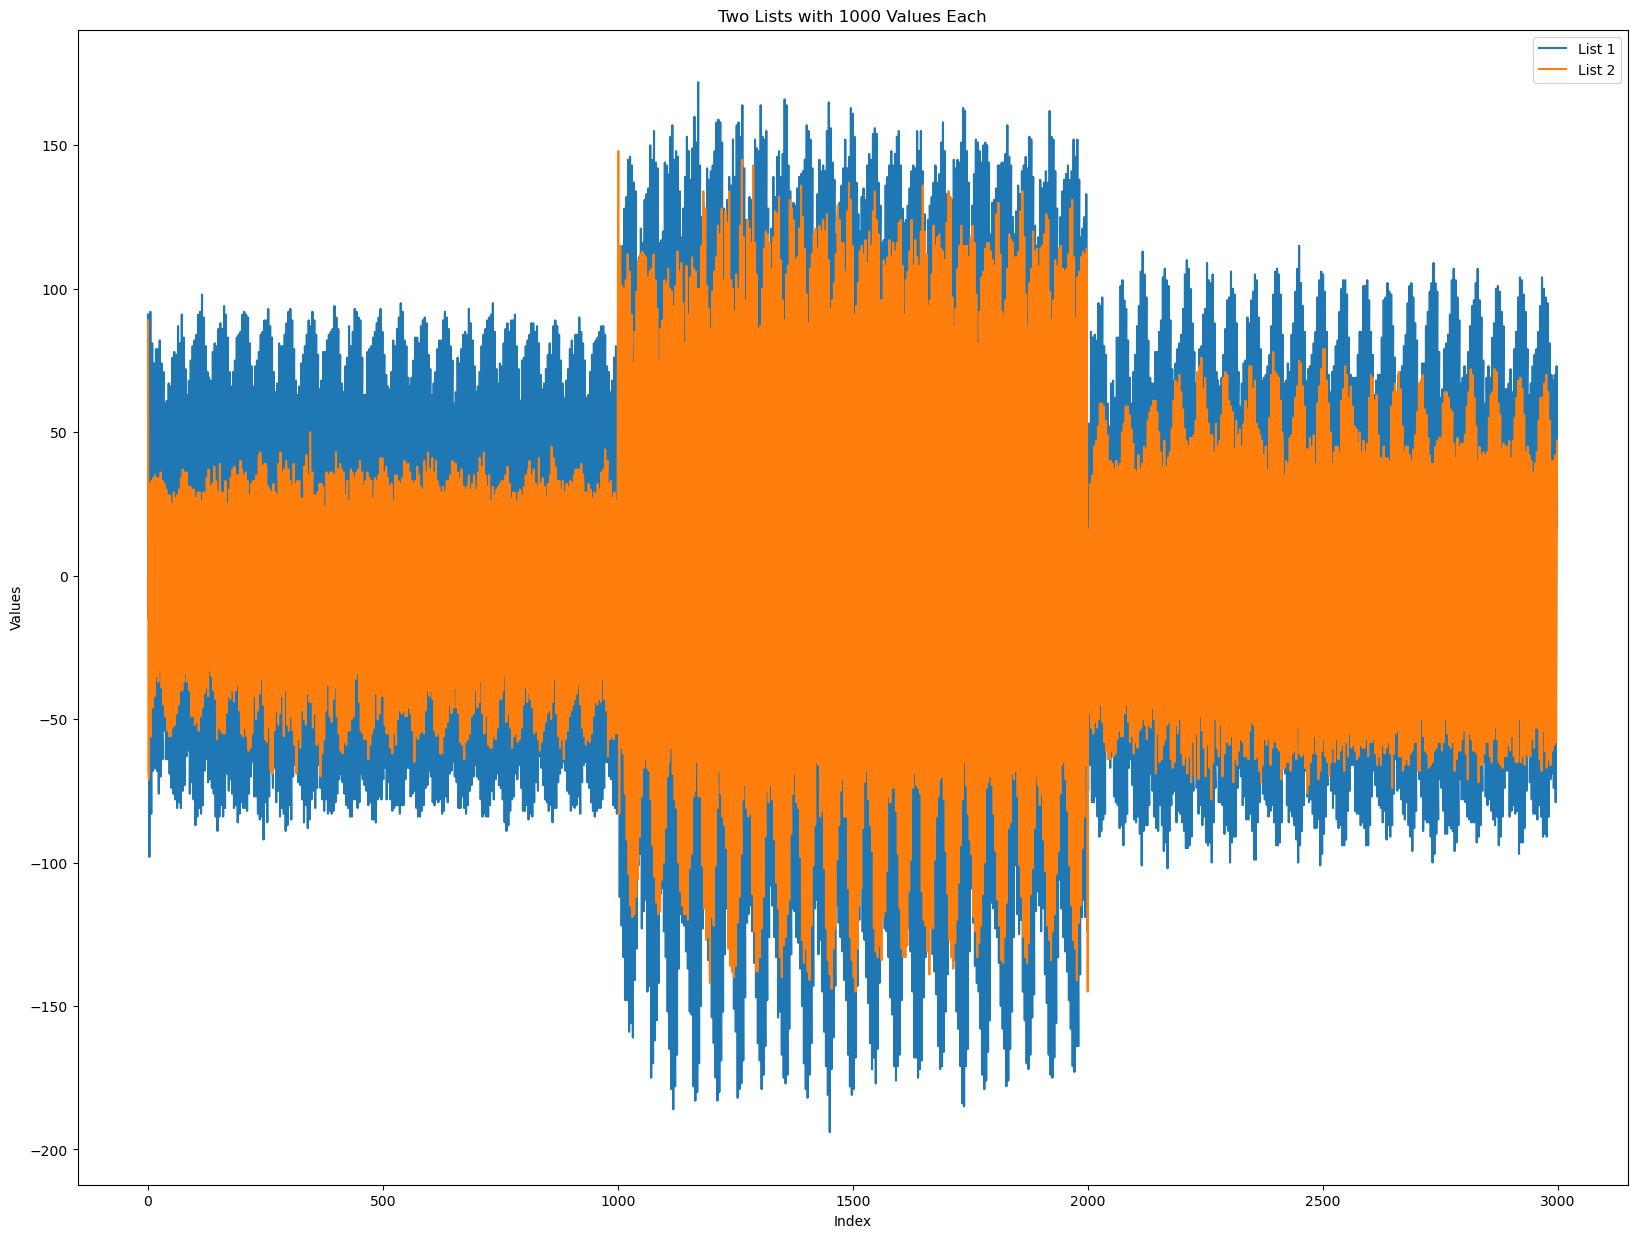

In [27]:
a_data = """91	-15	12	-98	-21	92	-1	-83	10	81	-13	-68	15	74	-13	-67	18	79	-20	-68	25	79	-34	-76	39	82	-47	-70	37	74	-53	-64	46	71	-53	-54	51	60	-64	-52	61	48	-64	-33	67	33	-69	-25	66	25	-74	-19	76	3	-76	1	78	-1	-78	6	77	-11	-81	14	87	-28	-79	20	81	-28	-81	24	91	-46	-75	42	83	-52	-73	50	72	-57	-63	62	63	-61	-55	68	54	-76	-45	75	34	-72	-38	80	21	-78	-13	82	10	-87	-5	84	-8	-84	12	91	-21	-81	25	92	-28	-83	27	98	-37	-80	37	90	-54	-68	47	80	-59	-64	53	71	-72	-57	69	53	-71	-49	68	37	-74	-27	78	26	-76	-12	81	9	-84	-6	80	0	-89	0	86	-13	-84	8	88	-17	-80	20	86	-27	-84	27	94	-45	-81	39	91	-57	-69	41	83	-58	-75	59	71	-71	-55	66	60	-76	-41	71	41	-81	-32	75	23	-80	-17	83	5	-86	-4	84	5	-83	4	85	-12	-79	9	91	-26	-81	16	92	-33	-81	34	91	-45	-82	33	90	-53	-76	44	81	-60	-70	54	73	-65	-59	66	60	-77	-48	73	48	-77	-37	75	31	-83	-15	78	13	-85	-10	84	4	-84	2	85	-9	-92	13	89	-23	-79	22	89	-31	-86	30	93	-45	-77	40	87	-55	-68	47	83	-65	-74	62	71	-67	-57	64	59	-79	-47	67	42	-75	-30	81	27	-84	-21	80	11	-81	-3	80	3	-83	4	84	-6	-89	15	88	-21	-87	17	92	-32	-80	27	93	-42	-85	40	89	-54	-70	46	79	-66	-65	55	68	-63	-63	63	58	-72	-48	66	49	-73	-34	74	27	-78	-18	77	17	-86	-14	80	1	-80	0	84	-9	-88	9	89	-15	-85	21	87	-25	-78	25	92	-42	-75	31	89	-50	-81	47	84	-58	-74	56	77	-66	-57	58	65	-74	-51	68	46	-78	-39	78	32	-82	-21	78	8	-78	-14	82	1	-83	1	84	-7	-82	16	85	-11	-83	11	86	-26	-82	25	94	-43	-79	32	90	-53	-76	47	86	-60	-71	52	77	-69	-65	63	67	-72	-56	64	52	-76	-39	73	40	-80	-26	76	24	-81	-16	87	4	-84	-4	80	-6	-84	10	85	-15	-78	19	93	-30	-78	29	92	-43	-81	42	90	-52	-79	50	89	-55	-69	51	76	-71	-57	58	63	-73	-54	63	52	-75	-43	78	29	-80	-26	79	22	-79	-18	80	4	-85	-4	83	-8	-85	9	85	-17	-86	18	88	-28	-78	25	90	-40	-77	38	93	-53	-78	41	85	-66	-71	52	77	-67	-65	57	70	-78	-51	66	51	-72	-46	65	42	-78	-25	71	23	-82	-15	82	9	-81	-10	80	-2	-80	1	86	-13	-80	10	90	-22	-83	21	95	-33	-80	30	92	-49	-80	40	82	-59	-71	49	80	-61	-67	59	69	-67	-54	66	54	-77	-48	69	40	-76	-30	75	30	-75	-20	83	9	-81	-2	83	4	-84	0	81	-11	-84	14	87	-23	-82	20	89	-30	-80	26	90	-42	-74	41	88	-51	-73	50	77	-68	-63	55	72	-70	-56	63	59	-79	-49	67	41	-80	-38	71	27	-78	-19	79	9	-79	-4	82	0	-78	-3	82	-12	-83	17	89	-22	-82	18	92	-27	-77	29	90	-37	-79	35	86	-55	-69	46	80	-57	-68	50	75	-65	-57	60	59	-70	-47	64	50	-72	-32	76	28	-81	-17	74	9	-81	-5	79	2	-77	-2	84	-9	-81	9	85	-18	-83	19	84	-26	-80	25	93	-36	-75	36	88	-51	-73	42	82	-61	-70	50	73	-66	-61	57	64	-70	-51	66	53	-71	-38	71	38	-78	-21	80	14	-84	-12	84	5	-83	-3	86	-10	-84	13	89	-20	-84	20	90	-30	-80	28	91	-40	-75	38	95	-49	-78	47	85	-63	-71	60	72	-69	-61	64	67	-73	-50	74	46	-74	-37	73	36	-78	-22	81	14	-86	-10	86	2	-89	2	88	-8	-87	13	85	-22	-82	25	89	-35	-78	28	89	-45	-77	45	91	-56	-69	51	80	-71	-62	58	72	-66	-57	61	61	-74	-41	75	38	-82	-31	76	20	-82	-19	80	12	-80	-7	82	-2	-85	7	84	-15	-83	13	88	-22	-84	26	88	-35	-79	32	85	-42	-72	37	87	-60	-75	47	81	-63	-61	55	70	-67	-56	65	59	-73	-47	67	44	-78	-33	72	27	-79	-17	77	11	-82	-6	81	0	-80	3	77	-10	-86	10	87	-23	-81	22	89	-32	-81	30	87	-45	-72	43	84	-58	-69	53	75	-66	-67	58	67	-65	-59	62	60	-68	-44	68	43	-75	-37	72	26	-76	-17	79	12	-82	-8	82	-1	-80	4	77	-9	-81	10	84	-21	-80	20	84	-29	-77	31	90	-42	-83	35	85	-56	-72	45	81	-59	-66	55	75	-65	-57	58	62	-72	-50	63	51	-74	-34	71	33	-79	-22	77	13	-82	-7	81	3	-84	-7	82	-9	-82	8	83	-19	-81	18	85	-25	-81	23	87	-39	-78	34	87	-51	-74	41	84	-61	-65	49	73	-65	-64	59	71	-70	-53	64	54	-71	-40	68	40	-80	-32	76	26	-81	-17	80	13	-83	-7	60	-22	110	37	-112	-28	112	27	-122	-23	115	11	-133	-6	128	-5	-148	9	132	-28	-148	37	145	-41	-159	54	146	-43	-156	69	143	-65	-161	73	137	-69	-141	95	134	-88	-130	102	97	-98	-101	111	85	-97	-83	121	68	-123	-50	116	31	-117	-34	131	16	-113	-8	133	-7	-145	18	135	-13	-143	29	150	-14	-175	53	145	-54	-170	63	155	-68	-162	71	144	-89	-155	89	142	-98	-142	110	116	-108	-111	109	117	-109	-77	120	61	-124	-59	144	46	-133	-17	143	11	-152	1	140	-16	-165	20	153	-30	-179	48	157	-46	-186	70	145	-71	-178	76	148	-81	-167	107	146	-99	-137	108	134	-100	-118	118	90	-121	-95	128	72	-122	-57	139	47	-131	-36	153	34	-137	-15	148	15	-152	-2	138	-11	-153	23	149	-26	-178	51	160	-46	-183	73	151	-51	-180	77	172	-82	-170	105	143	-95	-150	117	125	-106	-123	130	103	-115	-87	127	72	-126	-55	142	44	-134	-45	138	21	-139	-13	141	15	-154	10	143	-6	-163	23	148	-36	-175	53	158	-41	-183	68	159	-63	-180	81	158	-75	-169	92	151	-93	-152	115	128	-105	-132	119	110	-116	-100	131	76	-120	-60	139	59	-134	-45	136	23	-138	-16	152	6	-151	12	139	-15	-159	22	157	-33	-182	54	158	-48	-179	68	153	-64	-177	86	164	-90	-169	95	142	-93	-147	117	124	-97	-121	114	100	-118	-91	132	81	-115	-66	131	46	-124	-41	139	29	-135	-22	152	6	-147	0	149	-10	-163	18	148	-28	-169	44	164	-45	-179	66	153	-66	-174	88	152	-75	-164	90	155	-88	-148	101	128	-96	-126	113	108	-108	-96	121	75	-115	-74	139	61	-126	-39	132	31	-133	-18	146	9	-154	-9	148	-6	-152	13	139	-23	-167	45	147	-39	-175	56	166	-63	-177	73	164	-77	-174	86	143	-81	-158	105	134	-101	-132	113	112	-116	-106	130	82	-117	-65	129	64	-126	-45	135	34	-128	-21	139	1	-137	-10	140	4	-150	13	141	-25	-170	45	145	-29	-179	66	157	-60	-182	78	155	-73	-174	99	152	-86	-163	104	142	-95	-143	115	114	-108	-116	120	86	-113	-82	133	76	-132	-46	145	44	-127	-29	141	15	-145	-2	143	-6	-159	18	141	-29	-171	44	155	-47	-181	63	165	-66	-194	70	156	-69	-172	99	144	-83	-161	107	138	-99	-143	112	119	-115	-101	126	90	-121	-86	130	74	-126	-51	136	44	-131	-26	142	14	-141	-5	152	-2	-148	12	142	-23	-167	41	146	-46	-178	66	163	-57	-181	87	161	-69	-179	90	153	-86	-168	115	137	-96	-143	107	126	-99	-120	120	92	-108	-88	132	70	-124	-61	135	54	-127	-33	131	24	-140	-9	143	9	-149	3	147	-10	-163	27	145	-26	-172	60	154	-54	-168	77	156	-71	-177	84	154	-86	-165	99	137	-94	-142	112	129	-106	-118	116	99	-118	-97	117	80	-123	-60	136	52	-124	-40	139	34	-133	-18	143	4	-147	7	148	-10	-153	18	143	-28	-171	46	147	-53	-176	64	153	-75	-171	95	155	-79	-167	101	143	-90	-148	116	128	-102	-127	123	113	-107	-91	124	75	-118	-61	129	46	-123	-41	135	41	-131	-12	141	3	-145	6	143	-11	-168	19	142	-26	-168	38	155	-45	-175	65	148	-58	-172	74	155	-72	-169	89	141	-85	-147	104	126	-97	-133	109	103	-111	-100	124	74	-115	-64	129	47	-122	-43	132	36	-132	-20	137	7	-138	-4	143	-7	-146	15	137	-24	-164	36	140	-44	-172	63	151	-56	-171	77	158	-70	-166	90	148	-79	-152	98	133	-93	-139	108	110	-109	-112	125	85	-117	-76	131	66	-126	-47	145	43	-134	-22	142	7	-152	0	145	-7	-158	25	144	-28	-171	43	151	-48	-184	64	163	-66	-185	84	162	-81	-171	102	148	-93	-165	117	137	-104	-131	115	117	-109	-108	129	83	-121	-69	140	63	-136	-47	152	32	-142	-22	151	10	-145	5	148	-16	-158	32	144	-29	-174	47	150	-49	-179	76	151	-68	-176	96	150	-83	-166	93	144	-91	-155	106	119	-110	-114	130	97	-116	-84	131	75	-123	-60	135	52	-126	-37	143	20	-135	-5	143	3	-150	6	144	-19	-158	34	144	-37	-165	49	147	-43	-178	76	157	-66	-176	88	146	-80	-165	97	143	-95	-152	107	125	-103	-126	119	100	-101	-92	127	71	-118	-63	136	45	-125	-36	133	31	-120	-11	141	6	-145	9	143	-14	-155	28	146	-34	-170	46	142	-55	-172	74	153	-75	-167	86	152	-82	-154	95	139	-92	-146	105	122	-95	-117	115	103	-110	-92	118	70	-115	-62	138	50	-124	-36	135	24	-116	-18	137	5	-139	9	141	-12	-149	20	137	-33	-167	46	162	-44	-174	66	153	-60	-175	81	152	-74	-168	97	141	-83	-156	101	128	-97	-133	109	102	-106	-105	125	81	-116	-68	134	55	-126	-42	138	47	-131	-19	140	12	-138	0	143	0	-148	15	138	-18	-158	36	141	-45	-171	60	152	-54	-173	81	146	-70	-164	87	152	-87	-164	105	138	-94	-139	105	118	-99	-119	121	100	-113	-87	125	71	-119	-65	133	49	-124	-61	-75	-52	53	40	-66	-25	85	15	-79	-1	83	-2	-79	5	84	-8	-77	20	82	-20	-84	23	95	-33	-91	28	94	-37	-89	39	97	-37	-85	38	80	-52	-83	51	77	-59	-58	54	60	-63	-49	52	45	-67	-37	67	29	-63	-14	68	17	-77	-5	62	3	-79	6	83	-8	-80	13	83	-15	-88	6	101	-27	-87	32	103	-32	-94	39	96	-37	-86	53	93	-53	-83	56	82	-63	-67	64	69	-64	-64	60	43	-73	-36	71	33	-85	-25	77	10	-86	-5	87	-2	-84	12	94	-14	-90	22	106	-25	-101	22	113	-34	-89	45	105	-40	-87	53	97	-57	-87	57	82	-63	-80	57	69	-69	-49	67	55	-75	-41	67	27	-84	-25	78	21	-88	-19	78	9	-89	-4	85	0	-80	8	89	-13	-87	15	104	-26	-96	29	107	-38	-93	34	103	-41	-102	48	101	-58	-89	56	89	-68	-80	63	72	-76	-60	68	49	-75	-40	74	31	-86	-22	79	24	-82	-12	81	8	-83	-4	84	-7	-86	8	93	-9	-89	24	105	-29	-95	27	110	-35	-95	39	107	-41	-94	44	100	-53	-91	54	88	-67	-75	61	78	-69	-66	67	60	-74	-48	71	33	-83	-35	79	24	-80	-12	80	9	-87	-1	91	-7	-84	12	93	-12	-93	22	109	-26	-94	27	103	-35	-93	41	102	-48	-100	57	105	-55	-86	56	88	-67	-74	59	71	-66	-59	68	52	-79	-47	66	37	-79	-24	69	19	-80	-17	77	10	-90	-4	86	-1	-87	12	96	-6	-89	23	97	-22	-100	28	106	-37	-93	43	100	-47	-91	49	98	-52	-91	51	88	-58	-74	60	71	-65	-67	59	55	-70	-42	67	41	-80	-35	74	24	-77	-16	75	8	-85	-1	90	8	-85	4	88	-7	-83	17	96	-22	-89	26	99	-26	-99	39	105	-38	-99	46	103	-46	-86	51	90	-59	-79	61	79	-63	-65	68	64	-76	-48	69	38	-78	-33	70	25	-80	-16	73	9	-84	1	77	0	-82	0	87	-5	-80	19	98	-22	-86	22	106	-39	-94	39	107	-43	-94	46	105	-55	-93	51	98	-63	-86	59	84	-64	-67	64	67	-69	-51	68	48	-80	-46	74	24	-86	-24	71	16	-82	-6	84	0	-84	5	88	-11	-87	23	99	-24	-92	31	107	-37	-100	40	115	-39	-94	42	102	-53	-89	52	94	-61	-80	61	85	-62	-68	68	62	-77	-51	72	50	-79	-43	73	32	-78	-24	77	17	-83	-5	81	3	-88	4	85	-7	-88	19	97	-21	-85	28	103	-36	-101	37	106	-45	-97	46	105	-52	-90	54	99	-62	-84	59	85	-62	-73	58	70	-67	-55	64	49	-75	-39	71	35	-81	-29	73	20	-76	-12	80	7	-85	-2	82	0	-88	10	92	-15	-87	19	100	-33	-94	34	103	-41	-94	43	103	-45	-92	52	98	-55	-82	55	83	-63	-75	65	70	-66	-59	69	56	-66	-48	69	34	-82	-30	69	14	-83	-19	77	9	-83	1	85	-5	-87	9	85	-10	-86	22	101	-23	-88	32	101	-35	-94	46	103	-50	-94	50	96	-57	-87	54	85	-66	-77	62	77	-68	-62	63	54	-73	-45	68	37	-77	-23	70	20	-80	-18	70	4	-81	0	83	-5	-86	9	96	-8	-82	16	97	-22	-92	30	102	-33	-87	39	99	-42	-91	44	98	-48	-87	53	87	-60	-76	58	76	-61	-64	64	59	-75	-41	70	35	-74	-23	71	22	-78	-18	73	10	-83	0	80	5	-85	9	84	-9	-79	19	95	-20	-87	28	101	-32	-91	35	102	-41	-96	45	97	-47	-88	47	88	-53	-82	56	82	-62	-67	62	66	-71	-51	64	44	-77	-36	74	23	-89	-24	74	13	-85	-1	87	0	-86	9	92	-15	-86	17	99	-22	-91	32	102	-35	-100	39	109	-44	-97	49	102	-59	-90	56	99	-69	-85	59	78	-71	-69	62	62	-74	-51	65	41	-82	-38	79	26	-90	-18	81	11	-90	-3	84	-5	-87	13	91	-19	-88	21	103	-24	-89	32	107	-46	-96	39	103	-52	-93	53	97	-52	-87	55	89	-59	-71	66	67	-78	-58	69	52	-78	-42	73	35	-79	-31	70	19	-84	-9	78	3	-85	0	87	-3	-86	14	94	-20	-86	25	96	-26	-86	29	102	-42	-93	42	107	-46	-91	47	96	-54	-87	58	90	-62	-75	62	75	-65	-58	60	53	-77	-42	69	37	-80	-25	73	22	-78	-17	69	4	-82	-2	83	-3	-85	10	88	-14	-87	20	100	-22	-84	36	101	-42	-94	48	99	-47	-91	52	92	-55	-84	55	87	-60	-74	55	65	-68	-60	65	57	-68	-40	67	34	-84	-29	72	21	-82	-12	64	7	-80	1	79	-5	-83	9	85	-9	-82	22	97	-23	-97	28	104	-32	-93	40	103	-44	-93	44	98	-56	-88	47	92	-56	-75	60	79	-60	-61	63	62	-72	-46	67	40	-78	-30	73	22	-83	-25	77	11	-83	-4	79	1	-85	1	85	-8	-80	13	94	-19	-84	31	104	-29	-91	35	100	-42	-90	45	97	-48	-91	56	95	-59	-84	55	81	-60	-71	59	70	-69	-57	68	50	-74	-42	70	37	-79	-28	73	17"""
t_data = """89 -68 -71 0 32 3 -56 26 33 -15 -46 34 24 -22 -42 35 21 -22 -35 34 25 -26 -37 34 29 -32 -33 36 31 -39 -22 33 30 -45 -12 32 26 -49 -3 30 25 -54 2 28 22 -56 9 28 16 -56 16 25 9 -53 19 29 2 -52 25 27 -4 -48 28 27 -10 -45 30 23 -12 -40 34 28 -22 -40 37 29 -29 -37 36 28 -34 -30 36 31 -37 -23 31 29 -40 -11 31 29 -49 -2 30 22 -49 0 30 21 -52 8 27 13 -51 13 29 3 -54 25 29 1 -49 26 26 -5 -46 26 29 -13 -41 29 27 -25 -39 34 25 -23 -42 37 30 -28 -33 30 31 -35 -34 32 31 -40 -24 38 31 -43 -17 33 28 -57 -11 19 29 -53 0 39 19 -54 5 29 17 -55 9 29 7 -55 20 33 -4 -48 22 25 -6 -42 16 30 -18 -43 34 30 -17 -40 37 31 -27 -44 38 33 -33 -40 33 35 -38 -26 35 33 -47 -18 27 40 -55 -17 37 24 -56 0 35 31 -53 -2 36 13 -56 9 33 5 -61 23 28 1 -60 23 32 0 -55 18 33 -19 -42 29 33 -12 -50 35 24 -24 -47 32 42 -38 -41 43 37 -36 -30 38 38 -45 -16 30 39 -57 -17 39 37 -58 -1 30 31 -53 2 30 20 -68 5 29 14 -69 23 32 5 -54 24 29 -7 -47 28 25 -10 -52 39 29 -21 -48 43 20 -26 -42 36 35 -30 -56 37 37 -40 -31 40 34 -52 -24 31 37 -54 -8 32 33 -49 -11 25 31 -54 -4 39 20 -59 3 32 10 -69 30 33 3 -57 23 33 -8 -60 27 26 -10 -47 24 27 -8 -50 38 30 -18 -52 42 32 -31 -41 35 34 -33 -44 50 34 -44 -29 33 36 -53 -16 22 28 -48 -10 28 24 -59 3 29 29 -58 3 32 30 -70 14 32 10 -62 26 31 6 -57 19 24 -5 -47 36 28 -17 -38 35 23 -20 -49 36 30 -22 -51 36 35 -38 -43 35 35 -39 -31 43 32 -49 -19 37 32 -55 -11 30 39 -61 -4 37 29 -62 6 36 21 -58 13 28 13 -59 26 33 -7 -54 25 26 2 -54 33 37 -10 -50 36 24 -17 -49 34 32 -33 -36 34 36 -30 -34 37 37 -44 -31 40 35 -54 -17 29 36 -55 -11 31 28 -57 0 33 22 -57 3 36 20 -64 14 34 11 -59 22 33 0 -55 26 27 -8 -53 29 34 -16 -41 33 30 -16 -50 34 35 -30 -48 37 41 -39 -42 36 41 -42 -36 36 36 -52 -18 27 38 -55 -18 34 31 -55 -3 31 20 -60 4 32 22 -62 12 26 12 -55 15 35 0 -59 35 27 -2 -50 33 30 -17 -47 30 32 -28 -48 34 23 -19 -47 35 40 -38 -49 39 34 -49 -38 38 39 -46 -28 33 36 -48 -15 31 33 -54 -4 32 27 -65 4 33 24 -56 0 38 15 -57 16 35 6 -55 23 31 -2 -54 30 30 -13 -55 40 31 -21 -47 36 24 -26 -40 43 31 -29 -42 37 30 -34 -40 35 41 -43 -24 36 31 -54 -13 24 40 -56 -4 33 28 -55 2 31 21 -62 13 29 18 -62 12 31 2 -56 16 29 4 -53 25 33 -9 -51 33 31 -15 -45 35 28 -19 -48 32 40 -29 -46 39 38 -36 -39 39 31 -46 -28 36 31 -48 -21 32 34 -58 -9 37 24 -59 4 28 31 -64 7 30 15 -58 16 31 5 -57 22 35 2 -55 23 30 -7 -49 32 26 -14 -48 35 29 -21 -40 29 30 -21 -46 32 36 -31 -44 41 37 -34 -37 35 38 -48 -24 35 43 -55 -10 35 34 -49 -5 31 30 -59 7 35 20 -60 16 26 17 -60 20 31 3 -56 15 28 0 -57 27 30 -10 -53 29 31 -18 -43 32 32 -26 -43 33 31 -24 -40 28 33 -35 -31 35 33 -51 -18 38 36 -48 -10 32 32 -53 -5 27 26 -60 -4 29 21 -56 7 29 17 -55 17 26 7 -58 21 29 0 -57 30 29 -7 -53 28 25 -14 -45 31 26 -25 -39 35 29 -27 -44 32 37 -36 -41 40 33 -43 -33 34 35 -46 -20 34 37 -55 -12 28 32 -54 0 31 24 -57 10 41 9 -61 13 32 10 -58 20 34 -2 -54 24 31 -10 -51 26 27 -11 -48 32 28 -21 -47 31 35 -26 -50 45 32 -31 -44 41 36 -36 -36 38 36 -48 -21 32 33 -56 -13 33 33 -60 -5 30 21 -57 7 33 21 -64 16 29 10 -57 16 32 0 -54 29 31 -7 -49 24 33 -13 -47 32 24 -13 -45 33 35 -21 -43 37 33 -29 -41 33 37 -38 -37 37 34 -45 -22 39 35 -53 -15 35 29 -56 -2 29 25 -59 8 29 18 -57 4 32 13 -58 18 30 7 -55 12 27 0 -49 26 29 -7 -44 28 25 -18 -45 32 25 -18 -43 30 30 -33 -44 36 32 -35 -36 37 33 -43 -29 44 33 -47 -15 35 40 -63 -11 32 23 -57 0 33 26 -56 6 27 18 -57 16 29 12 -55 18 26 2 -55 89 148 -17 -83 -32 115 -14 -60 -24 101 -13 -62 -11 100 -15 -76 3 103 -21 -92 19 112 -25 -104 38 106 -27 -115 52 91 -31 -119 69 74 -39 -118 85 57 -45 -112 99 44 -49 -106 110 30 -57 -91 112 21 -60 -77 113 9 -64 -67 112 0 -64 -46 111 -7 -67 -31 104 -13 -68 -15 106 -18 -78 3 107 -22 -94 26 112 -25 -105 39 103 -26 -114 50 93 -30 -118 67 75 -37 -117 86 58 -44 -106 89 47 -46 -100 103 32 -54 -88 102 22 -58 -70 107 0 -65 -59 100 -1 -60 -42 99 -6 -69 -24 94 -12 -78 6 101 -18 -81 6 113 -29 -100 27 106 -16 -110 35 109 -22 -115 55 95 -38 -118 63 81 -41 -118 108 84 -16 -120 91 49 -63 -102 104 45 -54 -97 111 35 -61 -77 107 15 -75 -50 106 3 -65 -50 100 11 -77 -17 100 -14 -77 -4 115 -24 -101 14 134 -23 -116 33 128 -27 -127 39 101 -31 -126 72 93 -35 -142 83 86 -57 -119 99 56 -59 -122 106 58 -69 -101 111 36 -71 -81 122 12 -68 -67 119 6 -76 -51 128 10 -84 -18 103 -12 -87 -16 127 -17 -95 6 123 -19 -130 38 134 -34 -136 41 103 -31 -138 64 100 -30 -140 92 90 -46 -136 105 67 -52 -121 100 58 -59 -112 122 34 -68 -97 145 16 -77 -78 118 11 -73 -55 96 -3 -81 -33 124 -25 -84 -18 121 -28 -83 0 116 -22 -111 19 143 -19 -124 43 116 -37 -138 79 105 -36 -138 86 84 -35 -133 87 72 -45 -123 100 57 -61 -112 114 46 -65 -91 120 4 -75 -72 119 5 -79 -61 116 10 -73 -36 107 0 -78 -26 118 -23 -92 -6 127 -19 -107 22 126 -17 -116 34 132 -35 -133 57 110 -38 -140 80 96 -28 -129 89 73 -41 -126 105 54 -53 -118 108 46 -66 -113 131 24 -72 -90 128 12 -74 -76 124 3 -69 -52 110 -15 -79 -18 111 -19 -81 -6 121 -20 -98 13 136 -18 -127 37 125 -25 -135 54 114 -43 -130 75 98 -43 -138 88 79 -45 -141 107 65 -55 -122 112 47 -70 -101 119 33 -59 -87 121 5 -65 -52 114 -5 -66 -50 122 -12 -84 -20 120 -20 -82 -6 124 -19 -102 24 120 -15 -123 29 126 -20 -134 60 110 -34 -139 83 93 -35 -144 96 78 -45 -130 102 56 -59 -123 112 47 -59 -99 129 30 -70 -87 124 11 -75 -69 116 1 -71 -42 116 -7 -84 -23 106 -11 -84 -6 127 -16 -109 11 137 -26 -126 35 131 -24 -134 49 115 -30 -140 80 91 -30 -145 94 86 -46 -130 102 60 -47 -115 113 47 -57 -109 115 29 -58 -88 112 30 -72 -64 117 -3 -68 -40 109 -6 -78 -25 120 -15 -87 4 115 -19 -96 7 127 -14 -123 37 134 -25 -131 52 124 -38 -133 57 119 -37 -129 79 96 -43 -134 96 69 -54 -119 110 51 -65 -117 108 41 -68 -103 111 21 -75 -77 117 11 -79 -55 111 -8 -74 -34 116 -15 -74 -11 113 -22 -82 6 116 -34 -97 17 123 -27 -116 31 124 -23 -130 59 108 -37 -133 78 91 -38 -133 103 70 -52 -129 106 60 -57 -110 113 36 -63 -99 124 28 -67 -74 108 16 -69 -59 117 3 -73 -44 111 -9 -74 -13 108 -18 -76 -1 120 -18 -110 25 136 -22 -120 37 120 -28 -122 57 112 -31 -131 72 94 -37 -139 96 69 -57 -122 105 57 -58 -123 122 40 -61 -99 115 25 -70 -84 118 15 -77 -67 119 3 -71 -52 114 -6 -70 -27 113 -22 -78 -7 110 -20 -96 0 123 -16 -111 27 134 -29 -127 40 132 -27 -133 64 97 -36 -137 80 87 -47 -128 93 70 -51 -120 107 45 -61 -107 115 31 -60 -94 122 17 -63 -78 115 16 -65 -55 115 -2 -73 -31 115 -9 -83 -13 111 -12 -92 8 118 -21 -97 20 122 -15 -119 37 116 -29 -124 67 98 -38 -133 76 81 -38 -128 92 73 -43 -122 104 55 -56 -111 106 36 -54 -100 114 19 -62 -74 116 12 -72 -64 116 -8 -70 -41 113 -8 -73 -24 110 -17 -83 6 108 -23 -96 11 126 -23 -113 34 130 -32 -122 52 112 -30 -134 73 92 -37 -135 90 74 -39 -126 96 58 -55 -114 107 41 -65 -88 119 27 -68 -86 117 12 -69 -63 116 0 -71 -41 111 -8 -68 -32 111 -17 -77 -3 113 -14 -101 12 127 -26 -112 25 134 -27 -126 54 118 -32 -133 67 98 -38 -135 86 87 -46 -128 102 60 -45 -111 107 46 -62 -102 120 25 -66 -88 113 18 -70 -69 114 -2 -73 -43 108 -6 -80 -31 114 -15 -76 -16 115 -18 -92 1 119 -23 -103 23 126 -21 -122 44 124 -28 -127 58 99 -36 -134 89 80 -46 -124 96 65 -44 -118 110 46 -52 -104 108 42 -68 -96 114 20 -64 -76 115 13 -66 -58 107 -2 -65 -41 106 -6 -71 -19 107 -18 -82 2 112 -16 -101 25 128 -25 -115 31 131 -28 -127 56 111 -37 -130 76 90 -41 -141 104 72 -53 -121 106 54 -56 -115 111 40 -60 -95 113 28 -64 -84 112 11 -66 -59 114 7 -145 1 16 1 -48 20 32 6 -53 22 35 -12 -55 26 45 -23 -51 27 47 -31 -53 26 52 -37 -50 22 60 -45 -42 26 60 -51 -32 32 59 -58 -22 33 54 -61 -15 35 49 -64 -5 38 40 -64 0 40 30 -61 7 39 23 -63 17 37 8 -62 22 40 -2 -57 25 38 -12 -54 24 39 -22 -56 26 50 -35 -56 23 53 -39 -48 23 59 -45 -43 27 59 -51 -33 29 56 -58 -25 33 51 -56 -16 31 46 -62 -7 35 37 -58 0 36 26 -60 16 42 15 -54 18 37 4 -53 21 39 -5 -50 27 45 -24 -52 26 44 -25 -57 31 54 -34 -52 20 57 -35 -53 24 59 -45 -46 30 61 -50 -39 33 61 -69 -38 12 57 -55 -19 40 50 -65 -16 39 43 -64 -10 38 32 -59 3 47 14 -57 14 38 12 -52 14 41 -4 -51 24 43 -20 -64 27 51 -24 -67 23 61 -38 -65 24 68 -32 -52 31 67 -55 -45 31 70 -50 -41 42 64 -62 -21 43 58 -66 -25 42 51 -63 -7 47 34 -69 9 45 21 -63 12 48 12 -72 8 48 -2 -58 25 49 -8 -70 20 54 -21 -55 22 71 -35 -71 30 73 -43 -49 31 76 -54 -50 28 65 -60 -44 34 69 -70 -34 38 58 -59 -29 39 53 -67 -7 49 48 -78 3 49 28 -65 7 43 13 -50 24 53 -2 -60 33 45 -10 -63 38 47 -25 -52 32 56 -30 -70 25 69 -47 -62 37 71 -58 -48 33 70 -58 -42 31 61 -59 -27 32 59 -56 -21 40 57 -72 -14 44 43 -64 8 54 21 -66 15 49 19 -61 19 51 -5 -57 19 45 -3 -58 23 53 -16 -63 23 61 -37 -63 25 58 -38 -64 26 73 -54 -54 31 73 -51 -44 26 65 -52 -33 25 68 -64 -17 41 53 -63 -17 44 51 -68 -9 49 40 -72 3 47 25 -66 17 42 17 -57 27 45 -12 -59 27 37 -17 -57 26 55 -26 -66 17 70 -38 -60 26 78 -48 -57 31 71 -58 -48 35 70 -60 -33 35 69 -61 -29 39 61 -71 -21 50 44 -67 -9 35 30 -67 11 40 13 -65 24 39 9 -65 19 48 -12 -68 27 49 -17 -62 22 55 -29 -61 20 62 -35 -64 18 66 -49 -53 26 75 -62 -44 33 74 -63 -35 32 66 -62 -19 42 59 -67 -10 36 44 -76 -7 44 32 -73 8 48 23 -65 19 45 5 -62 22 49 -7 -56 26 39 -19 -62 20 60 -23 -71 28 66 -34 -68 25 72 -41 -61 26 79 -57 -45 29 79 -63 -39 34 68 -65 -27 33 60 -70 -15 39 50 -65 -4 39 38 -60 -4 43 19 -65 18 45 -1 -57 13 45 -6 -64 30 43 -21 -61 31 61 -23 -59 14 65 -40 -68 27 73 -45 -58 37 70 -44 -63 35 62 -55 -48 31 66 -60 -33 34 59 -59 -19 49 52 -61 -6 41 51 -64 3 46 28 -63 9 50 14 -59 19 43 1 -60 28 47 -18 -60 31 43 -23 -57 34 46 -27 -63 26 62 -34 -58 23 70 -50 -58 33 69 -57 -42 38 61 -62 -35 37 63 -66 -22 39 49 -63 -8 41 39 -66 -4 41 31 -59 10 45 13 -62 13 41 10 -60 23 41 -18 -58 28 40 -20 -62 24 59 -31 -74 20 64 -40 -62 26 67 -49 -55 29 64 -54 -40 33 71 -63 -29 42 65 -63 -20 42 52 -68 -12 43 43 -66 0 45 34 -64 8 45 18 -66 17 42 13 -62 22 40 -5 -61 31 44 -18 -58 33 49 -17 -58 23 57 -31 -68 25 67 -41 -68 23 68 -50 -48 33 70 -56 -46 37 58 -61 -30 31 56 -62 -19 42 48 -67 -7 42 35 -66 0 39 30 -65 11 39 17 -61 16 45 0 -60 20 47 -12 -58 26 48 -23 -58 27 48 -29 -61 18 60 -33 -58 26 64 -49 -50 34 64 -55 -38 28 62 -59 -34 32 58 -60 -20 41 57 -58 -9 35 46 -68 1 41 26 -64 5 48 20 -61 25 45 2 -61 24 46 -6 -57 29 46 -22 -54 29 49 -26 -62 29 59 -34 -71 30 64 -45 -55 29 72 -57 -43 30 70 -61 -34 34 62 -61 -24 39 52 -62 -12 40 33 -72 0 45 33 -66 8 42 19 -66 22 43 6 -62 26 42 -1 -58 32 43 -18 -58 24 55 -25 -63 26 63 -37 -65 24 64 -51 -57 24 72 -53 -50 35 71 -57 -38 39 60 -65 -25 37 56 -66 -15 41 44 -67 -4 46 36 -63 4 45 26 -63 18 45 6 -59 22 47 1 -61 28 41 -12 -56 24 47 -19 -63 25 55 -31 -65 22 62 -38 -65 24 68 -46 -50 31 69 -65 -38 35 65 -63 -28 35 56 -66 -17 35 43 -62 -9 45 45 -63 1 42 26 -63 11 40 19 -57 21 36 2 -60 24 39 -8 -53 30 43 -22 -53 20 54 -28 -64 27 62 -33 -68 28 62 -45 -54 29 67 -61 -44 32 70 -67 -34 44 64 -64 -17 36 54 -66 -11 40 40 -61 -5 40 29 -59 6 42 19 -58 4 47"""

list1 = [int(val) for val in a_data.split()]
list2 = [int(val) for val in t_data.split()]


x = list(range(3000))

# Create a figure and axis
plt.figure(figsize=(20, 15))

# Plot the two lists on the same axis
plt.plot(x, list1, label='List 1')
plt.plot(x, list2, label='List 2')


# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each')
plt.legend()

# Display the plot
plt.show()

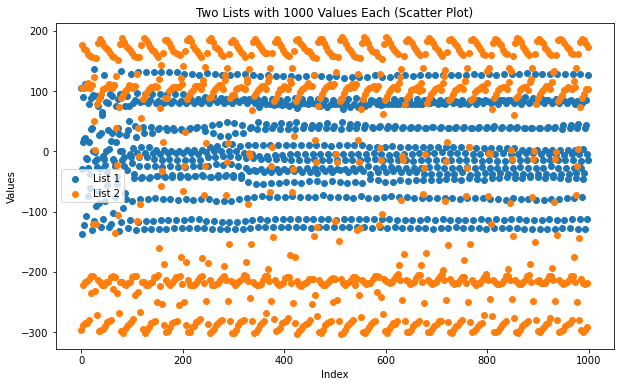

In [28]:
a_data = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
t_data = """-296	105	177	-221	-288	105	170	-217	-285	110	168	-215	-284	113	162	-211	-279	105	159	-206	-235	110	156	-207	-120	124	50	-232	3	155	-120	-271	78	180	-214	-298	87	187	-217	-297	96	181	-222	-294	103	175	-221	-289	105	171	-216	-283	106	168	-216	-281	112	164	-208	-280	105	159	-206	-229	110	157	-208	-135	125	38	-235	-22	151	-106	-268	73	178	-216	-298	89	188	-217	-301	94	182	-220	-295	100	175	-221	-290	104	172	-218	-286	110	169	-216	-283	109	163	-209	-278	105	159	-206	-238	108	156	-206	-116	129	39	-233	-8	157	-87	-267	56	176	-216	-295	87	188	-217	-302	93	185	-221	-296	99	180	-222	-292	104	173	-218	-284	106	168	-217	-283	107	166	-209	-281	108	161	-208	-250	106	157	-205	-160	120	72	-224	-57	144	-32	-253	16	163	-187	-288	88	185	-214	-299	89	185	-219	-298	100	180	-221	-291	103	173	-219	-284	107	167	-213	-283	107	163	-209	-281	107	162	-208	-255	106	160	-207	-176	122	112	-220	-65	141	-25	-250	32	166	-183	-288	87	184	-214	-300	93	188	-221	-299	98	183	-222	-292	102	175	-221	-289	108	170	-219	-283	108	166	-213	-281	109	161	-209	-278	103	157	-206	-177	119	111	-218	-73	140	-24	-249	14	163	-186	-287	89	185	-214	-301	91	188	-221	-298	98	181	-222	-295	103	174	-220	-288	107	171	-218	-284	110	168	-213	-281	110	161	-210	-279	103	158	-207	-190	118	127	-214	-72	138	-18	-248	14	162	-154	-282	89	182	-215	-302	93	184	-217	-301	94	182	-221	-296	103	175	-219	-288	105	170	-215	-283	106	165	-212	-281	105	161	-205	-279	103	156	-206	-183	115	120	-215	-88	136	-3	-243	-7	160	-154	-282	68	181	-217	-301	92	187	-220	-299	97	182	-222	-294	102	176	-221	-288	105	171	-220	-284	108	167	-213	-282	108	163	-207	-269	104	163	-207	-196	116	123	-215	-67	139	-25	-248	8	163	-142	-278	84	181	-214	-298	89	186	-218	-297	97	179	-221	-293	103	175	-220	-284	104	169	-218	-283	108	163	-210	-281	107	160	-208	-277	104	158	-209	-172	119	113	-219	-67	138	-30	-252	26	166	-176	-284	83	184	-215	-303	91	187	-221	-298	98	179	-223	-295	103	177	-220	-290	105	172	-219	-286	109	167	-216	-284	113	166	-212	-280	109	162	-212	-253	109	156	-212	-140	127	19	-238	-18	155	-126	-274	76	181	-213	-299	88	186	-218	-302	96	186	-222	-297	102	179	-222	-288	106	173	-219	-285	109	167	-215	-283	112	164	-211	-281	108	158	-210	-250	111	159	-212	-115	131	-4	-246	-18	157	-148	-281	84	185	-212	-303	88	189	-219	-302	97	185	-222	-296	104	178	-219	-290	106	171	-217	-286	105	168	-214	-283	111	164	-208	-279	106	159	-208	-221	111	157	-211	-131	128	19	-239	-17	155	-127	-275	70	179	-213	-299	87	189	-216	-302	95	186	-220	-296	102	179	-219	-292	105	172	-218	-286	106	167	-212	-283	108	165	-207	-282	104	165	-207	-233	108	159	-208	-123	129	5	-242	-15	154	-104	-270	62	178	-211	-298	86	189	-215	-301	92	186	-217	-295	98	179	-219	-290	103	173	-216	-285	106	169	-212	-286	107	165	-207	-282	103	162	-203	-189	113	123	-214	-80	136	-7	-246	-14	159	-170	-282	79	183	-213	-300	88	187	-215	-300	94	183	-220	-296	102	180	-219	-290	104	173	-217	-286	103	169	-210	-285	106	164	-205	-282	100	160	-205	-188	113	102	-217	-70	139	-28	-251	-5	161	-168	-284	80	183	-213	-300	89	188	-217	-299	96	184	-220	-295	98	179	-218	-290	103	174	-217	-286	105	168	-212	-282	106	164	-206	-281	101	159	-204	-197	114	125	-213	-82	135	-16	-247	15	165	-155	-283	85	185	-212	-299	88	187	-216	-301	95	183	-220	-295	101	178	-219	-290	104	175	-218	-288	107	168	-213	-283	106	164	-208	-280	103	160	-208	-181	116	117	-219	-74	138	-27	-250	8	163	-154	-283	85	185	-213	-300	89	187	-218	-298	98	183	-221	-295	102	178	-218	-289	104	173	-218	-286	106	168	-213	-285	108	162	-208	-271	102	160	-205	-204	114	134	-213	-74	138	-3	-245	-5	160	-121	-273	71	180	-214	-300	89	187	-216	-300	95	185	-220	-298	102	179	-220	-293	105	176	-218	-288	106	169	-214	-284	107	164	-207	-282	104	161	-206	-195	115	138	-214	-86	134	3	-245	-13	158	-140	-277	60	180	-213	-300	88	188	-216	-301	92	186	-220	-296	102	181	-220	-289	105	173	-217	-286	106	169	-213	-284	107	164	-207	-281	101	160	-205	-187	115	120	-216	-75	139	-12	-248	1	161	-151	-280	78	183	-215	-298	89	187	-213	-300	95	183	-219	-294	100	179	-219	-292	103	172	-219	-287	109	169	-213	-285	108	163	-206	-277	104	160	-207	-193	115	131	-213	-84	134	-13	-248	-1	160	-138	-279	83	185	-213	-300	89	187	-216	-298	94	184	-220	-296	101	179	-219	-290	104	173	-217	-287	106	170	-213	-284	105	164	-206	-280	103	162	-207	-175	117	107	-216	-72	139	-24	-250	4	162	-144	-279	73	182	-212	-297	88	187	-219	-299	96	185	-220	-296	103	178	-219	-291	104	173
"""

plt.figure(figsize=(10, 6))

# Plot the two lists as scatter plots
plt.scatter(range(len(list1)), list1, label='List 1')
plt.scatter(range(len(list2)), list2, label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each (Scatter Plot)')
plt.legend()

# Display the plot
plt.show()




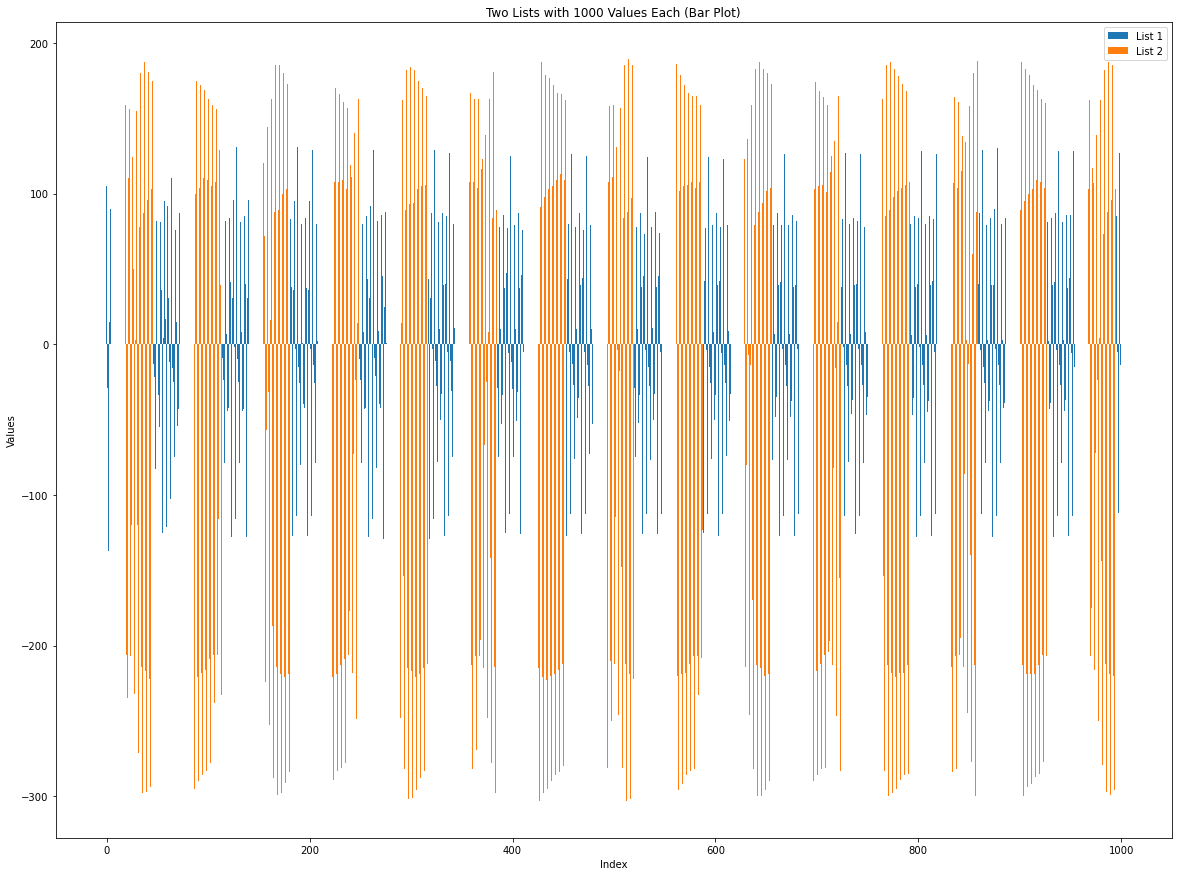

In [29]:
a_data = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
t_data = """-296	105	177	-221	-288	105	170	-217	-285	110	168	-215	-284	113	162	-211	-279	105	159	-206	-235	110	156	-207	-120	124	50	-232	3	155	-120	-271	78	180	-214	-298	87	187	-217	-297	96	181	-222	-294	103	175	-221	-289	105	171	-216	-283	106	168	-216	-281	112	164	-208	-280	105	159	-206	-229	110	157	-208	-135	125	38	-235	-22	151	-106	-268	73	178	-216	-298	89	188	-217	-301	94	182	-220	-295	100	175	-221	-290	104	172	-218	-286	110	169	-216	-283	109	163	-209	-278	105	159	-206	-238	108	156	-206	-116	129	39	-233	-8	157	-87	-267	56	176	-216	-295	87	188	-217	-302	93	185	-221	-296	99	180	-222	-292	104	173	-218	-284	106	168	-217	-283	107	166	-209	-281	108	161	-208	-250	106	157	-205	-160	120	72	-224	-57	144	-32	-253	16	163	-187	-288	88	185	-214	-299	89	185	-219	-298	100	180	-221	-291	103	173	-219	-284	107	167	-213	-283	107	163	-209	-281	107	162	-208	-255	106	160	-207	-176	122	112	-220	-65	141	-25	-250	32	166	-183	-288	87	184	-214	-300	93	188	-221	-299	98	183	-222	-292	102	175	-221	-289	108	170	-219	-283	108	166	-213	-281	109	161	-209	-278	103	157	-206	-177	119	111	-218	-73	140	-24	-249	14	163	-186	-287	89	185	-214	-301	91	188	-221	-298	98	181	-222	-295	103	174	-220	-288	107	171	-218	-284	110	168	-213	-281	110	161	-210	-279	103	158	-207	-190	118	127	-214	-72	138	-18	-248	14	162	-154	-282	89	182	-215	-302	93	184	-217	-301	94	182	-221	-296	103	175	-219	-288	105	170	-215	-283	106	165	-212	-281	105	161	-205	-279	103	156	-206	-183	115	120	-215	-88	136	-3	-243	-7	160	-154	-282	68	181	-217	-301	92	187	-220	-299	97	182	-222	-294	102	176	-221	-288	105	171	-220	-284	108	167	-213	-282	108	163	-207	-269	104	163	-207	-196	116	123	-215	-67	139	-25	-248	8	163	-142	-278	84	181	-214	-298	89	186	-218	-297	97	179	-221	-293	103	175	-220	-284	104	169	-218	-283	108	163	-210	-281	107	160	-208	-277	104	158	-209	-172	119	113	-219	-67	138	-30	-252	26	166	-176	-284	83	184	-215	-303	91	187	-221	-298	98	179	-223	-295	103	177	-220	-290	105	172	-219	-286	109	167	-216	-284	113	166	-212	-280	109	162	-212	-253	109	156	-212	-140	127	19	-238	-18	155	-126	-274	76	181	-213	-299	88	186	-218	-302	96	186	-222	-297	102	179	-222	-288	106	173	-219	-285	109	167	-215	-283	112	164	-211	-281	108	158	-210	-250	111	159	-212	-115	131	-4	-246	-18	157	-148	-281	84	185	-212	-303	88	189	-219	-302	97	185	-222	-296	104	178	-219	-290	106	171	-217	-286	105	168	-214	-283	111	164	-208	-279	106	159	-208	-221	111	157	-211	-131	128	19	-239	-17	155	-127	-275	70	179	-213	-299	87	189	-216	-302	95	186	-220	-296	102	179	-219	-292	105	172	-218	-286	106	167	-212	-283	108	165	-207	-282	104	165	-207	-233	108	159	-208	-123	129	5	-242	-15	154	-104	-270	62	178	-211	-298	86	189	-215	-301	92	186	-217	-295	98	179	-219	-290	103	173	-216	-285	106	169	-212	-286	107	165	-207	-282	103	162	-203	-189	113	123	-214	-80	136	-7	-246	-14	159	-170	-282	79	183	-213	-300	88	187	-215	-300	94	183	-220	-296	102	180	-219	-290	104	173	-217	-286	103	169	-210	-285	106	164	-205	-282	100	160	-205	-188	113	102	-217	-70	139	-28	-251	-5	161	-168	-284	80	183	-213	-300	89	188	-217	-299	96	184	-220	-295	98	179	-218	-290	103	174	-217	-286	105	168	-212	-282	106	164	-206	-281	101	159	-204	-197	114	125	-213	-82	135	-16	-247	15	165	-155	-283	85	185	-212	-299	88	187	-216	-301	95	183	-220	-295	101	178	-219	-290	104	175	-218	-288	107	168	-213	-283	106	164	-208	-280	103	160	-208	-181	116	117	-219	-74	138	-27	-250	8	163	-154	-283	85	185	-213	-300	89	187	-218	-298	98	183	-221	-295	102	178	-218	-289	104	173	-218	-286	106	168	-213	-285	108	162	-208	-271	102	160	-205	-204	114	134	-213	-74	138	-3	-245	-5	160	-121	-273	71	180	-214	-300	89	187	-216	-300	95	185	-220	-298	102	179	-220	-293	105	176	-218	-288	106	169	-214	-284	107	164	-207	-282	104	161	-206	-195	115	138	-214	-86	134	3	-245	-13	158	-140	-277	60	180	-213	-300	88	188	-216	-301	92	186	-220	-296	102	181	-220	-289	105	173	-217	-286	106	169	-213	-284	107	164	-207	-281	101	160	-205	-187	115	120	-216	-75	139	-12	-248	1	161	-151	-280	78	183	-215	-298	89	187	-213	-300	95	183	-219	-294	100	179	-219	-292	103	172	-219	-287	109	169	-213	-285	108	163	-206	-277	104	160	-207	-193	115	131	-213	-84	134	-13	-248	-1	160	-138	-279	83	185	-213	-300	89	187	-216	-298	94	184	-220	-296	101	179	-219	-290	104	173	-217	-287	106	170	-213	-284	105	164	-206	-280	103	162	-207	-175	117	107	-216	-72	139	-24	-250	4	162	-144	-279	73	182	-212	-297	88	187	-219	-299	96	185	-220	-296	103	178	-219	-291	104	173
"""

x = list(range(1000))

# Create a figure and axis with an increased size (e.g., 10 inches by 6 inches)
plt.figure(figsize=(20, 15))

# Plot the two lists as bar plots side by side
plt.bar(x, list1, width=0.4, align='center', label='List 1')
plt.bar([i + 0.4 for i in x], list2, width=0.4, align='center', label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each (Bar Plot)')
plt.legend()

# Display the plot
plt.show()

In [30]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="D:/project/DRDO/Ml_gui_v2/ashok.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Data for input 1
data1 = """-29	-76	79	10	-59	-25	89	32	-121	73	32	-17	-104	101	-8	-39	-50	83	35	-130	43	94	-5	-113	126	-10	-53	-70	77	21	-81	-10	90	22	-121	112	7	-18	-89	88	2	-36	-41	87	38	-128	46	79	0	-110	118	-15	-36	-64	78	24	-105	0	90	13	-120	131	-2	-23	-80	84	1	-42	-40	74	34	-123	52	70	-11	-108	118	-12	-36	-55	82	20	-113	12	91	-3	-121	132	-7	-29	-76	75	5	-54	-29	87	34	-122	67	49	-14	-105	108	-12	-41	-53	80	34	-132	22	94	-2	-115	130	-15	-34	-72	79	13	-68	-23	89	26	-121	87	26	-19	-100	96	-6	-38	-46	83	36	-131	34	95	-7	-112	127	-15	-35	-69	77	15	-74	-15	91	23	-120	99	23	-21	-97	96	-7	-37	-48	84	37	-132	31	93	-6	-115	127	-13	-33	-69	76	16	-73	-17	93	26	-120	101	18	-19	-95	96	-7	-38	-48	82	37	-132	29	95	-7	-112	126	-17	-36	-68	79	14	-75	-17	89	20	-122	98	21	-18	-96	95	-7	-35	-47	83	36	-130	35	95	-5	-111	128	-18	-33	-70	78	11	-67	-20	89	25	-121	89	22	-19	-101	95	-8	-38	-46	82	36	-130	35	95	-5	-112	125	-17	-34	-68	77	18	-77	-18	92	23	-121	96	20	-17	-98	94	-2	-34	-50	83	45	-132	21	88	-2	-117	121	-10	-31	-70	78	32	-85	-20	95	30	-124	89	19	-13	-100	91	8	-32	-48	87	51	-131	16	86	2	-119	122	-5	-28	-69	81	36	-87	-21	96	30	-123	85	19	-13	-100	92	10	-32	-47	88	52	-130	21	79	0	-118	118	-4	-31	-67	80	36	-91	-20	97	28	-123	94	18	-14	-99	93	8	-31	-49	87	52	-130	17	85	0	-118	122	-5	-30	-69	81	34	-87	-19	96	25	-123	98	18	-15	-97	92	4	-33	-49	86	46	-131	19	89	-4	-116	122	-8	-33	-68	80	29	-89	-18	94	23	-121	98	20	-16	-97	94	2	-34	-50	85	45	-131	19	91	-5	-116	124	-8	-34	-67	81	28	-88	-20	94	23	-122	98	21	-15	-96	92	3	-33	-49	85	46	-131	22	88	-5	-114	122	-9	-34	-67	80	28	-89	-19	93	22	-121	101	20	-17	-95	94	3	-36	-46	85	43	-129	25	87	-7	-115	120	-8	-34	-66	80	28	-92	-18	94	21	-122	104	16	-19	-92	90	5	-39	-40	87	44	-127	32	85	-6	-115	121	-8	-35	-67	81	29	-96	-10	95	16	-122	114	8	-20	-90	86	9	-43	-39	88	44	-127	37	76	-7	-114	117	-7	-34	-65	81	34	-100	-10	97	14	-123	120	3	-20	-86	84	15	-44	-35	90	46	-126	37	64	-5	-114	111	-3	-32	-62	83	42	-115	-10	98	14	-124	131	0	-21	-81	82	24	-52	-33	93	46	-126	44	54	-4	-114	109	1	-32	-64	83	46	-117	-8	99	13	-124	126	2	-21	-84	82	23	-52	-32	93	46	-125	45	53	-5	-113	108	0	-29	-63	83	46	-120	-4	99	10	-123	132	0	-21	-79	82	21	-54	-32	92	43	-124	49	54	-7	-112	109	-3	-34	-59	82	41	-123	1	97	6	-121	133	-5	-26	-78	81	17	-57	-29	90	38	-122	61	42	-11	-107	102	-2	-37	-54	83	42	-135	12	97	-2	-118	129	-8	-30	-71	79	20	-71	-23	91	29	-123	81	30	-17	-102	97	0	-36	-51	83	42	-132	21	97	-6	-116	126	-9	-34	-69	80	23	-81	-18	94	23	-122	100	24	-18	-97	94	1	-37	-47	85	41	-131	24	90	-7	-114	122	-10	-36	-66	80	28	-99	-5	95	15	-120	119	7	-22	-89	86	7	-41	-38	87	42	-127	41	77	-9	-114	117	-10	-36	-62	80	31	-107	-1	95	8	-121	125	3	-23	-83	85	11	-48	-32	90	38	-125	50	60	-10	-109	109	-8	-37	-58	82	35	-121	9	96	4	-120	133	-4	-27	-79	80	14	-55	-29	90	38	-124	54	52	-11	-110	107	-3	-36	-57	82	38	-127	9	96	2	-120	134	-4	-27	-78	80	16	-58	-29	89	37	-122	62	44	-13	-107	104	-2	-38	-53	85	41	-135	15	97	-4	-117	128	-9	-31	-72	79	21	-74	-20	92	28	-122	85	25	-17	-101	96	1	-37	-47	86	43	-132	23	91	-6	-116	123	-7	-35	-67	80	27	-88	-16	94	21	-121	100	22	-19	-96	93	3	-37	-45	85	42	-131	26	87	-6	-115	121	-8	-35	-67	81	28	-94	-11	94	17	-122	114	9	-21	-90	86	8	-43	-38	87	42	-127	41	74	-8	-113	116	-6	-35	-64	81	32	-107	-1	95	9	-122	126	1	-24	-84	83	11	-46	-34	89	40	-125	49	60	-10	-111	111	-5	-36	-60	82	36	-119	4	96	6	-122	133	-3	-27	-79	82	12	-57	-26	89	39	-121	54	55	-13	-108	104	-3	-36	-60	81	20	-135	14	99	6	-140	125	-6	-29	-73	80	19	-65	-27	91	34	-122	70	40	-11	-109	102	0	-37	-52	84	42	-134	16	98	-2	-119	128	-8	-30	-71	79	22	-75	-21	93	28	-122	85	27	-17	-100	95	2	-33	-49	84	44	-131
"""
data1_values = [int(val) for val in data1.split()]

# Data for input 2
data2 = """21	97	-5	-117	124	-8	-34	-65	81	27	-90	-16	94	20	-122	107	16	-21	-93	89	8	-40	-41	87	43	-128	36	82	-7	-114	119	-8	-35	-62	81	30	-105	-6	96	13	-122	130	3	-23	-83	84	10	-44	-35	89	42	-125	46	64	-9	-112	111	-5	-37	-58	82	36	-120	1	96	8	-122	135	-1	-25	-80	82	14	-54	-32	90	39	-124	54	55	-10	-109	108	-4	-36	-56	82	40	-134	9	96	2	-120	132	-7	-28	-75	81	17	-65	-27	89	36	-122	67	41	-14	-106	101	0	-36	-53	83	42	-135	14	96	-2	-117	129	-8	-31	-71	79	21	-74	-23	92	30	-122	83	32	-18	-101	98	0	-38	-49	85	42	-134	19	96	-6	-116	127	-9	-35	-67	80	25	-87	-21	92	23	-123	99	23	-15	-97	96	0	-37	-48	84	44	-132	21	97	-6	-115	125	-9	-36	-67	80	26	-92	-17	93	22	-122	112	12	-19	-89	89	6	-41	-41	87	43	-127	36	81	-7	-114	118	-7	-37	-61	80	31	-105	-4	95	13	-122	134	1	-24	-83	83	10	-44	-34	87	42	-126	47	64	-9	-112	112	-6	-38	-59	82	35	-119	3	96	8	-122	135	-2	-25	-79	82	12	-49	-32	89	39	-125	53	56	-9	-111	110	-4	-37	-57	82	37	-122	7	97	5	-121	134	-3	-27	-77	81	15	-55	-30	90	37	-122	64	45	-9	-108	107	-4	-37	-55	82	38	-126	7	95	4	-119	133	-5	-27	-75	80	17	-59	-28	90	37	-122	65	46	-11	-107	105	-4	-38	-55	83	41	-130	13	96	0	-117	129	-8	-33	-72	79	21	-70	-23	91	31	-121	81	29	-15	-101	96	0	-36	-49	85	42	-132	21	91	-5	-115	123	-9	-35	-66	79	26	-83	-16	93	22	-121	104	18	-18	-96	92	1	-36	-46	85	45	-130	27	83	-6	-114	119	-9	-36	-64	81	29	-98	-6	95	16	-121	116	5	-21	-87	85	10	-43	-35	88	43	-126	42	68	-7	-113	114	-8	-34	-62	80	34	-106	-2	95	10	-121	130	-1	-25	-81	82	12	-50	-30	90	40	-125	52	53	-9	-111	108	-6	-35	-58	81	37	-119	4	95	6	-123	133	-4	-26	-78	81	14	-55	-28	89	38	-122	57	45	-10	-108	106	-4	-37	-54	83	40	-130	10	97	1	-119	131	-8	-30	-74	79	16	-64	-24	91	33	-122	72	30	-12	-103	97	-2	-34	-49	85	42	-133	21	91	-3	-116	124	-13	-32	-68	79	24	-81	-17	93	23	-122	100	19	-17	-96	93	0	-35	-45	85	43	-130	27	85	-5	-115	120	-11	-35	-65	80	28	-96	-7	95	18	-121	111	7	-20	-90	86	7	-41	-37	87	42	-127	40	74	-7	-112	117	-9	-35	-63	79	29	-101	-2	95	12	-121	126	-2	-25	-82	81	12	-50	-26	91	37	-123	61	42	-11	-107	104	-3	-38	-53	83	38	-134	16	96	-1	-116	129	-9	-32	-71	78	18	-70	-21	92	30	-121	77	27	-16	-102	96	-1	-38	-48	84	40	-133	23	91	-5	-115	123	-11	-34	-67	79	24	-88	-16	94	20	-121	102	18	-20	-96	92	1	-35	-44	85	42	-130	29	84	-5	-114	120	-11	-36	-66	80	28	-95	-6	93	16	-119	111	6	-23	-90	86	7	-41	-37	88	41	-126	39	74	-9	-113	118	-11	-36	-63	80	30	-106	0	94	11	-119	126	0	-23	-84	83	7	-43	-35	88	42	-124	42	65	-8	-112	114	-9	-35	-61	80	32	-111	0	96	10	-121	130	0	-23	-82	82	11	-45	-31	89	39	-123	51	53	-9	-111	110	-7	-32	-59	81	35	-117	3	96	7	-122	132	-3	-25	-80	81	12	-51	-28	90	37	-123	56	46	-11	-108	105	-5	-36	-55	82	39	-131	12	97	0	-118	130	-10	-30	-72	79	18	-66	-23	92	33	-121	75	28	-16	-103	96	-1	-34	-51	85	42	-133	20	96	-4	-115	124	-11	-34	-66	56	20	-80	-18	94	21	-120	103	18	-19	-95	106	2	-38	-43	83	45	-128	33	79	-3	-112	119	-13	-14	-61	80	27	-94	-5	92	17	-121	121	4	-21	-87	62	-1	-38	-37	90	38	-133	41	77	-7	-111	116	-10	-37	-60	80	33	-106	5	96	7	-122	130	-20	-26	-80	83	11	-48	-32	89	38	-123	53	54	-9	-111	111	-9	-36	-58	81	34	-115	3	95	7	-121	132	-3	-24	-79	81	11	-49	-29	90	38	-122	54	52	-10	-108	108	-6	-38	-55	80	37	-125	14	95	0	-118	130	-9	-30	-72	80	16	-64	-26	91	31	-121	77	30	-14	-102	97	-2	-38	-49	83	40	-131	22	96	-5	-115	125	-13	-33	-71	78	20	-74	-22	91	26	-120	90	21	-17	-98	95	0	-37	-48	84	41	-131	25	90	-5	-115	123	-10	-36	-67	79	25	-88	-17	93	20	-121	104	14	-20	-92	90	3	-37	-40	87	41	-126	37	80	-8	-112	117	-11	-38	-62	80	28	-103	1	95	10	-120	127	-1	-24	-81	82	9	-49	-31	88	38	-124	49	57	-10	-110	108	-6	-39	-56	82	35	-127	11	95	0	-118	131	-8	-27	-76	79	15	-61	-26	90
"""
data2_values = [int(val) for val in data2.split()]

# Helper function to process a set of 1000 values through the TFLite model
def process_data(input_data):
    input_data = np.array([data_values], dtype=np.float32)
    input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    return interpreter.get_tensor(output_details[0]['index'])

# Process data1 through the TFLite model
predictions_data1 = process_data(data1_values)

# Process data2 through the TFLite model
predictions_data2 = process_data(data2_values)

# Combine the results
combined_predictions = np.concatenate((predictions_data1, predictions_data2), axis=0)

# Get the final predicted label
predicted_label_index = np.argmax(combined_predictions)
actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]
predicted_label = actions[predicted_label_index]
predicted1=np.argmax(predictions_data1)
predicted2=np.argmax(predictions_data2)
print("1:",predicted1)
print("2:",predicted2)

print("Predicted Label:", predicted_label)

[{'name': 'serving_default_conv1d_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
1: 2
2: 2
Predicted Label: lateral


In [39]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter_emg1 = tf.lite.Interpreter(model_path="D:/project/DRDO/Ml_gui_v2/ashok.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def process_data(input_data):
    input_data = np.array([data_values], dtype=np.float32)
    input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    return interpreter.get_tensor(output_details[0]['index'])

# Data for input 1
data1 = """-29	-76	79	10	-59	-25	89	32	-121	73	32	-17	-104	101	-8	-39	-50	83	35	-130	43	94	-5	-113	126	-10	-53	-70	77	21	-81	-10	90	22	-121	112	7	-18	-89	88	2	-36	-41	87	38	-128	46	79	0	-110	118	-15	-36	-64	78	24	-105	0	90	13	-120	131	-2	-23	-80	84	1	-42	-40	74	34	-123	52	70	-11	-108	118	-12	-36	-55	82	20	-113	12	91	-3	-121	132	-7	-29	-76	75	5	-54	-29	87	34	-122	67	49	-14	-105	108	-12	-41	-53	80	34	-132	22	94	-2	-115	130	-15	-34	-72	79	13	-68	-23	89	26	-121	87	26	-19	-100	96	-6	-38	-46	83	36	-131	34	95	-7	-112	127	-15	-35	-69	77	15	-74	-15	91	23	-120	99	23	-21	-97	96	-7	-37	-48	84	37	-132	31	93	-6	-115	127	-13	-33	-69	76	16	-73	-17	93	26	-120	101	18	-19	-95	96	-7	-38	-48	82	37	-132	29	95	-7	-112	126	-17	-36	-68	79	14	-75	-17	89	20	-122	98	21	-18	-96	95	-7	-35	-47	83	36	-130	35	95	-5	-111	128	-18	-33	-70	78	11	-67	-20	89	25	-121	89	22	-19	-101	95	-8	-38	-46	82	36	-130	35	95	-5	-112	125	-17	-34	-68	77	18	-77	-18	92	23	-121	96	20	-17	-98	94	-2	-34	-50	83	45	-132	21	88	-2	-117	121	-10	-31	-70	78	32	-85	-20	95	30	-124	89	19	-13	-100	91	8	-32	-48	87	51	-131	16	86	2	-119	122	-5	-28	-69	81	36	-87	-21	96	30	-123	85	19	-13	-100	92	10	-32	-47	88	52	-130	21	79	0	-118	118	-4	-31	-67	80	36	-91	-20	97	28	-123	94	18	-14	-99	93	8	-31	-49	87	52	-130	17	85	0	-118	122	-5	-30	-69	81	34	-87	-19	96	25	-123	98	18	-15	-97	92	4	-33	-49	86	46	-131	19	89	-4	-116	122	-8	-33	-68	80	29	-89	-18	94	23	-121	98	20	-16	-97	94	2	-34	-50	85	45	-131	19	91	-5	-116	124	-8	-34	-67	81	28	-88	-20	94	23	-122	98	21	-15	-96	92	3	-33	-49	85	46	-131	22	88	-5	-114	122	-9	-34	-67	80	28	-89	-19	93	22	-121	101	20	-17	-95	94	3	-36	-46	85	43	-129	25	87	-7	-115	120	-8	-34	-66	80	28	-92	-18	94	21	-122	104	16	-19	-92	90	5	-39	-40	87	44	-127	32	85	-6	-115	121	-8	-35	-67	81	29	-96	-10	95	16	-122	114	8	-20	-90	86	9	-43	-39	88	44	-127	37	76	-7	-114	117	-7	-34	-65	81	34	-100	-10	97	14	-123	120	3	-20	-86	84	15	-44	-35	90	46	-126	37	64	-5	-114	111	-3	-32	-62	83	42	-115	-10	98	14	-124	131	0	-21	-81	82	24	-52	-33	93	46	-126	44	54	-4	-114	109	1	-32	-64	83	46	-117	-8	99	13	-124	126	2	-21	-84	82	23	-52	-32	93	46	-125	45	53	-5	-113	108	0	-29	-63	83	46	-120	-4	99	10	-123	132	0	-21	-79	82	21	-54	-32	92	43	-124	49	54	-7	-112	109	-3	-34	-59	82	41	-123	1	97	6	-121	133	-5	-26	-78	81	17	-57	-29	90	38	-122	61	42	-11	-107	102	-2	-37	-54	83	42	-135	12	97	-2	-118	129	-8	-30	-71	79	20	-71	-23	91	29	-123	81	30	-17	-102	97	0	-36	-51	83	42	-132	21	97	-6	-116	126	-9	-34	-69	80	23	-81	-18	94	23	-122	100	24	-18	-97	94	1	-37	-47	85	41	-131	24	90	-7	-114	122	-10	-36	-66	80	28	-99	-5	95	15	-120	119	7	-22	-89	86	7	-41	-38	87	42	-127	41	77	-9	-114	117	-10	-36	-62	80	31	-107	-1	95	8	-121	125	3	-23	-83	85	11	-48	-32	90	38	-125	50	60	-10	-109	109	-8	-37	-58	82	35	-121	9	96	4	-120	133	-4	-27	-79	80	14	-55	-29	90	38	-124	54	52	-11	-110	107	-3	-36	-57	82	38	-127	9	96	2	-120	134	-4	-27	-78	80	16	-58	-29	89	37	-122	62	44	-13	-107	104	-2	-38	-53	85	41	-135	15	97	-4	-117	128	-9	-31	-72	79	21	-74	-20	92	28	-122	85	25	-17	-101	96	1	-37	-47	86	43	-132	23	91	-6	-116	123	-7	-35	-67	80	27	-88	-16	94	21	-121	100	22	-19	-96	93	3	-37	-45	85	42	-131	26	87	-6	-115	121	-8	-35	-67	81	28	-94	-11	94	17	-122	114	9	-21	-90	86	8	-43	-38	87	42	-127	41	74	-8	-113	116	-6	-35	-64	81	32	-107	-1	95	9	-122	126	1	-24	-84	83	11	-46	-34	89	40	-125	49	60	-10	-111	111	-5	-36	-60	82	36	-119	4	96	6	-122	133	-3	-27	-79	82	12	-57	-26	89	39	-121	54	55	-13	-108	104	-3	-36	-60	81	20	-135	14	99	6	-140	125	-6	-29	-73	80	19	-65	-27	91	34	-122	70	40	-11	-109	102	0	-37	-52	84	42	-134	16	98	-2	-119	128	-8	-30	-71	79	22	-75	-21	93	28	-122	85	27	-17	-100	95	2	-33	-49	84	44	-131
"""
data1_values = [int(val) for val in data1.split()]

# Data for input 2
data2 = """21	97	-5	-117	124	-8	-34	-65	81	27	-90	-16	94	20	-122	107	16	-21	-93	89	8	-40	-41	87	43	-128	36	82	-7	-114	119	-8	-35	-62	81	30	-105	-6	96	13	-122	130	3	-23	-83	84	10	-44	-35	89	42	-125	46	64	-9	-112	111	-5	-37	-58	82	36	-120	1	96	8	-122	135	-1	-25	-80	82	14	-54	-32	90	39	-124	54	55	-10	-109	108	-4	-36	-56	82	40	-134	9	96	2	-120	132	-7	-28	-75	81	17	-65	-27	89	36	-122	67	41	-14	-106	101	0	-36	-53	83	42	-135	14	96	-2	-117	129	-8	-31	-71	79	21	-74	-23	92	30	-122	83	32	-18	-101	98	0	-38	-49	85	42	-134	19	96	-6	-116	127	-9	-35	-67	80	25	-87	-21	92	23	-123	99	23	-15	-97	96	0	-37	-48	84	44	-132	21	97	-6	-115	125	-9	-36	-67	80	26	-92	-17	93	22	-122	112	12	-19	-89	89	6	-41	-41	87	43	-127	36	81	-7	-114	118	-7	-37	-61	80	31	-105	-4	95	13	-122	134	1	-24	-83	83	10	-44	-34	87	42	-126	47	64	-9	-112	112	-6	-38	-59	82	35	-119	3	96	8	-122	135	-2	-25	-79	82	12	-49	-32	89	39	-125	53	56	-9	-111	110	-4	-37	-57	82	37	-122	7	97	5	-121	134	-3	-27	-77	81	15	-55	-30	90	37	-122	64	45	-9	-108	107	-4	-37	-55	82	38	-126	7	95	4	-119	133	-5	-27	-75	80	17	-59	-28	90	37	-122	65	46	-11	-107	105	-4	-38	-55	83	41	-130	13	96	0	-117	129	-8	-33	-72	79	21	-70	-23	91	31	-121	81	29	-15	-101	96	0	-36	-49	85	42	-132	21	91	-5	-115	123	-9	-35	-66	79	26	-83	-16	93	22	-121	104	18	-18	-96	92	1	-36	-46	85	45	-130	27	83	-6	-114	119	-9	-36	-64	81	29	-98	-6	95	16	-121	116	5	-21	-87	85	10	-43	-35	88	43	-126	42	68	-7	-113	114	-8	-34	-62	80	34	-106	-2	95	10	-121	130	-1	-25	-81	82	12	-50	-30	90	40	-125	52	53	-9	-111	108	-6	-35	-58	81	37	-119	4	95	6	-123	133	-4	-26	-78	81	14	-55	-28	89	38	-122	57	45	-10	-108	106	-4	-37	-54	83	40	-130	10	97	1	-119	131	-8	-30	-74	79	16	-64	-24	91	33	-122	72	30	-12	-103	97	-2	-34	-49	85	42	-133	21	91	-3	-116	124	-13	-32	-68	79	24	-81	-17	93	23	-122	100	19	-17	-96	93	0	-35	-45	85	43	-130	27	85	-5	-115	120	-11	-35	-65	80	28	-96	-7	95	18	-121	111	7	-20	-90	86	7	-41	-37	87	42	-127	40	74	-7	-112	117	-9	-35	-63	79	29	-101	-2	95	12	-121	126	-2	-25	-82	81	12	-50	-26	91	37	-123	61	42	-11	-107	104	-3	-38	-53	83	38	-134	16	96	-1	-116	129	-9	-32	-71	78	18	-70	-21	92	30	-121	77	27	-16	-102	96	-1	-38	-48	84	40	-133	23	91	-5	-115	123	-11	-34	-67	79	24	-88	-16	94	20	-121	102	18	-20	-96	92	1	-35	-44	85	42	-130	29	84	-5	-114	120	-11	-36	-66	80	28	-95	-6	93	16	-119	111	6	-23	-90	86	7	-41	-37	88	41	-126	39	74	-9	-113	118	-11	-36	-63	80	30	-106	0	94	11	-119	126	0	-23	-84	83	7	-43	-35	88	42	-124	42	65	-8	-112	114	-9	-35	-61	80	32	-111	0	96	10	-121	130	0	-23	-82	82	11	-45	-31	89	39	-123	51	53	-9	-111	110	-7	-32	-59	81	35	-117	3	96	7	-122	132	-3	-25	-80	81	12	-51	-28	90	37	-123	56	46	-11	-108	105	-5	-36	-55	82	39	-131	12	97	0	-118	130	-10	-30	-72	79	18	-66	-23	92	33	-121	75	28	-16	-103	96	-1	-34	-51	85	42	-133	20	96	-4	-115	124	-11	-34	-66	56	20	-80	-18	94	21	-120	103	18	-19	-95	106	2	-38	-43	83	45	-128	33	79	-3	-112	119	-13	-14	-61	80	27	-94	-5	92	17	-121	121	4	-21	-87	62	-1	-38	-37	90	38	-133	41	77	-7	-111	116	-10	-37	-60	80	33	-106	5	96	7	-122	130	-20	-26	-80	83	11	-48	-32	89	38	-123	53	54	-9	-111	111	-9	-36	-58	81	34	-115	3	95	7	-121	132	-3	-24	-79	81	11	-49	-29	90	38	-122	54	52	-10	-108	108	-6	-38	-55	80	37	-125	14	95	0	-118	130	-9	-30	-72	80	16	-64	-26	91	31	-121	77	30	-14	-102	97	-2	-38	-49	83	40	-131	22	96	-5	-115	125	-13	-33	-71	78	20	-74	-22	91	26	-120	90	21	-17	-98	95	0	-37	-48	84	41	-131	25	90	-5	-115	123	-10	-36	-67	79	25	-88	-17	93	20	-121	104	14	-20	-92	90	3	-37	-40	87	41	-126	37	80	-8	-112	117	-11	-38	-62	80	28	-103	1	95	10	-120	127	-1	-24	-81	82	9	-49	-31	88	38	-124	49	57	-10	-110	108	-6	-39	-56	82	35	-127	11	95	0	-118	131	-8	-27	-76	79	15	-61	-26	90
"""
data2_values = [int(val) for val in data2.split()]



# Process data1 through the TFLite model
predictions_data1 = process_data(data1_values)

# Process data2 through the TFLite model
predictions_data2 = process_data(data2_values)

# Combine the results
combined_predictions = np.concatenate((predictions_data1, predictions_data2), axis=0)

# Get the final predicted label
predicted_label_index = np.argmax(combined_predictions)
actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]
predicted_label = actions[predicted_label_index]
predicted1=np.argmax(predictions_data1)
predicted2=np.argmax(predictions_data2)
print("1:",predicted1)
print("2:",predicted2)

print("Predicted Label:", predicted_label)

[{'name': 'serving_default_conv1d_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
1: 2
2: 2
Predicted Label: lateral


In [40]:
emg1 = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
emg2 = """85	238	46	-199	-52	204	-120	-47	-51	195	-161	-9	-67	185	-158	-55	10	174	-166	-71	203	77	-183	-66	191	-160	-32	-70	199	-153	-27	-69	183	-162	-65	86	181	-167	-69	196	27	-124	-57	192	-164	-11	-66	194	-153	-44	-55	176	-164	-69	181	141	-174	-68	192	-46	-70	-59	195	-158	-14	-68	189	-156	-57	0	176	-167	-72	204	92	-182	-64	190	-153	-34	-71	199	-153	-31	-69	185	-161	-67	68	179	-167	-76	197	47	-140	-64	190	-165	-14	-73	192	-152	-55	-47	173	-166	-79	205	101	-182	-66	188	-166	-11	-72	189	-150	-57	-34	175	-165	-80	203	86	-184	-66	190	-165	-12	-71	190	-151	-57	-33	175	-165	-78	203	86	-184	-66	189	-166	-7	-68	190	-152	-47	-36	174	-165	-70	205	69	-187	-60	190	-165	-3	-64	191	-151	-45	-39	174	-166	-71	205	76	-187	-61	190	-166	-5	-65	192	-151	-42	-43	172	-166	-70	205	76	-186	-61	189	-165	-3	-63	193	-151	-45	-41	174	-166	-69	206	72	-187	-62	190	-164	-3	-66	192	-151	-43	-34	175	-166	-68	205	68	-173	-60	191	-165	-4	-66	191	-152	-46	-37	173	-166	-72	204	66	-168	-59	190	-164	0	-67	190	-151	-46	-39	173	-166	-75	204	78	-172	-66	190	-166	-8	-72	190	-151	-55	-35	173	-165	-81	204	87	-172	-69	188	-165	-11	-77	190	-152	-57	-44	172	-166	-86	203	96	-160	-72	189	-166	-14	-79	190	-150	-61	-42	171	-166	-91	201	97	-150	-73	188	-166	-10	-81	189	-151	-64	-40	171	-166	-89	201	89	-157	-74	189	-165	-9	-76	188	-152	-56	-34	173	-165	-81	204	91	-162	-68	189	-166	-10	-71	189	-151	-57	-18	173	-166	-78	202	71	-160	-63	190	-164	-12	-67	188	-152	-57	-6	173	-166	-75	201	56	-140	-60	190	-164	-9	-67	187	-153	-56	-6	173	-166	-75	201	62	-148	-62	189	-164	-6	-68	189	-152	-55	-13	172	-167	-76	202	61	-147	-63	189	-164	-5	-68	187	-152	-54	-4	174	-166	-74	201	58	-147	-63	190	-164	-6	-65	188	-153	-54	-11	172	-166	-73	202	55	-145	-65	189	-163	-2	-67	187	-152	-55	-10	173	-167	-75	201	52	-135	-60	190	-164	-4	-66	188	-152	-56	-7	174	-166	-76	201	63	-151	-63	189	-164	-5	-68	188	-151	-55	-16	173	-167	-76	201	63	-152	-64	189	-164	-2	-69	188	-153	-54	-18	173	-167	-76	201	60	-146	-65	189	-164	-2	-69	188	-152	-55	-5	173	-165	-75	200	56	-136	-62	190	-163	-4	-68	188	-151	-55	-16	172	-167	-76	201	63	-149	-65	190	-163	-1	-67	188	-151	-55	-12	172	-167	-75	200	51	-133	-63	190	-162	-2	-67	188	-154	-54	-7	173	-166	-77	201	56	-136	-62	190	-163	-2	-68	189	-152	-55	-10	172	-168	-75	201	56	-138	-61	189	-163	-2	-69	189	-152	-54	-8	172	-167	-76	201	59	-140	-62	190	-163	-7	-71	189	-152	-51	-24	172	-166	-76	202	70	-159	-64	189	-163	-3	-69	189	-151	-53	-19	172	-166	-77	201	62	-146	-63	190	-163	-1	-70	188	-152	-52	-16	172	-166	-76	202	63	-148	-63	190	-163	-3	-71	187	-152	-53	-12	172	-166	-76	202	64	-148	-65	190	-164	-3	-69	188	-152	-51	-19	172	-166	-75	203	67	-152	-64	190	-164	-2	-69	188	-151	-52	-19	172	-166	-76	202	65	-148	-62	189	-164	0	-68	189	-152	-50	-17	173	-166	-75	203	67	-148	-66	190	-164	-3	-68	188	-152	-51	-20	174	-166	-75	203	69	-156	-67	188	-164	-3	-70	189	-151	-50	-23	172	-166	-76	203	70	-155	-64	189	-164	-2	-70	189	-151	-51	-23	172	-166	-75	203	69	-155	-66	188	-164	-2	-68	189	-151	-51	-24	173	-166	-75	202	73	-158	-65	189	-164	-3	-68	189	-150	-52	-24	173	-165	-74	203	70	-155	-64	190	-163	-2	-68	190	-151	-52	-23	172	-165	-74	203	69	-155	-63	189	-164	-3	-69	190	-152	-51	-30	173	-166	-73	203	73	-161	-63	189	-164	-2	-69	190	-151	-51	-24	172	-165	-73	203	67	-159	-63	189	-164	-1	-68	189	-151	-49	-23	172	-165	-73	203	68	-161	-65	189	-164	-2	-67	191	-152	-49	-29	172	-166	-73	203	64	-159	-60	190	-164	0	-66	191	-151	-47	-29	172	-167	-74	203	66	-165	-62	189	-165	-1	-67	191	-152	-47	-33	171	-166	-73	204	67	-166	-62	189	-165	-1	-66	190	-152	-47	-27	173	-166	-73	204	68	-167	-62	190	-165	-1	-67	190	-151	-47	-31	172	-166	-73	205	71	-171	-61	190	-166	-3	-66	191	-151	-47	-37	172	-165	-72	205	73	-170	-61	190	-165	-2	-66	190	-152	-45	-34	171	-167	-73	205	72	-171	-59	190	-165	-2	-67	190	-151	-47	-35	171	-166	-71	205	68	-167	-60	189	-165	-4	-68	190	-152	-45	-36	172	-166	-71	205	70	-168	-59	190	-165	-4	-65	191	-152	-45	-31	171	-166	-70	204	61	-165	-57	190	-165	-4	-63	192	-151	-45	-29	172	-166	-69	205	61	-167	-58	191	-165	-1	-64	190	-151	-43	-27	171	-166	-70	205	58	-163	-62	190	-165	0	-64	190	-151	-47	-27	172	-167	-72	205	63	-164	-60	190	-164	-5	-65
"""
emg3 = """-202	-92	93	6	-96	33	58	19	-110	89	34	39	-101	117	34	14	-114	115	27	-98	-94	124	22	-115	61	64	21	-114	107	35	41	-96	122	31	-22	-127	109	22	-101	-64	94	17	-117	75	46	25	-109	113	36	44	-98	121	30	-77	-122	114	20	-109	-15	75	14	-117	89	40	34	-102	118	34	19	-109	116	28	-96	-102	121	23	-114	55	64	22	-114	104	40	41	-97	121	34	-14	-123	111	26	-100	-77	102	22	-115	73	51	29	-110	113	42	40	-102	121	31	-95	-105	119	25	-113	68	51	30	-111	112	44	31	-105	122	31	-97	-97	122	24	-114	69	51	30	-111	113	43	32	-105	121	31	-97	-97	121	25	-113	69	48	28	-112	113	37	32	-104	122	25	-98	-87	124	21	-114	70	46	25	-111	113	35	33	-104	122	25	-97	-89	124	22	-113	68	47	24	-112	113	36	36	-103	122	24	-97	-90	123	21	-113	69	46	24	-112	113	37	35	-102	122	23	-98	-87	123	22	-113	70	46	27	-112	114	36	31	-106	121	23	-98	-86	116	18	-113	70	45	26	-111	113	37	33	-103	121	25	-97	-85	114	19	-113	71	42	29	-111	113	37	34	-104	120	27	-97	-91	115	24	-113	70	48	31	-111	114	42	34	-105	121	31	-96	-97	115	25	-113	69	50	33	-110	113	44	37	-105	122	34	-96	-101	108	28	-112	69	52	37	-110	112	47	37	-106	121	36	-95	-102	102	28	-113	70	49	38	-110	114	48	37	-105	121	35	-96	-98	107	28	-112	71	48	34	-111	115	43	33	-107	122	30	-97	-100	110	23	-113	71	49	32	-111	115	42	24	-109	120	27	-98	-88	109	21	-114	73	48	32	-109	116	41	18	-110	120	25	-100	-80	99	18	-114	74	46	32	-109	116	38	19	-111	119	27	-99	-83	104	20	-113	74	46	31	-109	117	39	22	-109	120	26	-98	-83	102	21	-113	74	43	32	-109	117	37	18	-111	119	24	-99	-82	104	20	-114	74	45	30	-110	116	38	21	-109	120	24	-99	-79	101	21	-113	74	41	31	-110	116	37	21	-111	119	25	-99	-78	97	19	-114	73	43	31	-109	116	39	19	-110	119	27	-99	-84	105	21	-114	73	45	31	-109	115	39	23	-109	120	27	-97	-84	105	23	-113	73	43	32	-110	116	38	26	-109	120	26	-98	-81	103	22	-113	74	43	32	-109	116	38	18	-111	118	25	-98	-80	98	19	-114	74	43	31	-108	116	39	24	-108	120	25	-98	-84	103	23	-113	73	43	31	-110	117	39	21	-110	120	26	-98	-76	96	19	-114	74	42	32	-109	117	38	20	-110	119	26	-98	-80	97	20	-115	73	42	32	-110	116	39	21	-110	119	25	-98	-80	99	19	-114	73	42	33	-109	116	37	20	-110	119	25	-97	-81	99	20	-114	72	45	32	-110	115	37	29	-108	120	27	-97	-88	108	22	-114	71	44	31	-110	115	39	25	-109	120	27	-97	-83	102	22	-112	73	41	32	-109	115	38	24	-108	120	25	-98	-83	103	21	-113	73	43	34	-109	116	38	21	-109	120	26	-98	-85	103	21	-113	73	44	31	-109	115	37	25	-108	120	26	-98	-86	106	21	-113	72	44	31	-110	115	37	25	-107	120	26	-98	-85	103	21	-113	73	42	31	-109	115	37	24	-108	120	25	-99	-86	103	21	-113	73	43	31	-109	115	38	27	-108	120	27	-97	-87	107	24	-112	72	45	31	-109	114	39	27	-108	120	27	-98	-89	107	20	-113	71	44	31	-109	115	39	27	-107	121	27	-97	-87	106	22	-112	71	43	31	-110	114	39	28	-107	120	26	-97	-90	108	23	-113	71	44	30	-110	115	39	27	-107	120	25	-97	-88	106	20	-113	72	43	31	-110	115	39	27	-107	120	25	-98	-88	106	22	-112	71	44	29	-110	115	39	32	-106	120	26	-98	-89	110	21	-113	70	44	30	-110	115	38	28	-106	120	25	-98	-86	108	21	-113	72	42	31	-109	115	37	27	-107	121	24	-97	-87	111	23	-113	70	44	28	-111	115	37	30	-106	121	25	-97	-84	109	20	-114	72	41	30	-110	115	36	30	-106	122	25	-96	-86	112	21	-112	71	44	28	-110	114	37	32	-105	121	24	-97	-86	112	21	-114	71	43	28	-111	115	36	28	-106	120	25	-96	-87	114	21	-114	71	43	28	-111	115	36	31	-104	121	25	-96	-89	115	20	-114	69	45	28	-111	115	37	34	-104	121	24	-97	-89	115	21	-114	70	45	27	-111	114	37	31	-104	121	24	-97	-90	115	19	-114	70	45	29	-111	114	37	32	-103	122	24	-97	-87	113	19	-113	71	44	29	-110	113	36	33	-104	121	24	-97	-88	113	18	-113	69	44	27	-110	115	36	29	-106	121	23	-98	-83	112	17	-114	71	45	26	-110	114	35	29	-105	121	22	-97	-84	114	17	-114	71	44	26	-111	113	34	29	-105	121	22	-98	-81	112	19	-113	72	42	27	-110	114	35	29	-107	121	23	-97	-85	112	20	-113	71	45	29	-110
"""

actions = ["cylindrical", "hook", "lateral", "palmer", "spherical", "tip"]


def convert_to_list(data):
    return [int(val) for val in data.split()]


def process_data(data_values):
    input_data = np.array([data_values], dtype=np.float32)
    input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    return interpreter.get_tensor(output_details[0]['index'])



data1 = convert_to_list(emg1)
data2 = convert_to_list(emg2)
data3 = convert_to_list(emg3)

interpreter_emg1 = tf.lite.Interpreter(model_path="D:/project/DRDO/Ml_gui_v2/ashok_all.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = (1,1000,1)
output_shape = (1,6)
print(input_details)

interpreter.resize_tensor_input(input_details[0]['index'], input_shape)
interpreter.resize_tensor_input(output_details[0]['index'], output_shape)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


predictions_data1 = process_data(data1)
predictions_data2 = process_data(data2)
predictions_data3 = process_data(data3)


# Get the final predicted label
predicted_label_index_1 = np.argmax(predictions_data1)
predicted_label_index_2 = np.argmax(predictions_data2)
predicted_label_index_3 = np.argmax(predictions_data3)

predicted_label_1 = actions[predicted_label_index_1]
predicted_label_2 = actions[predicted_label_index_2]
predicted_label_3 = actions[predicted_label_index_3]


print("1:",predicted_label_index_1)
print("2:",predicted_label_index_2)
print("3:",predicted_label_index_3)


print("Predicted Label:", predicted_label_1)
print("Predicted Label:", predicted_label_2)
print("Predicted Label:", predicted_label_3)



[{'name': 'serving_default_conv1d_input:0', 'index': 0, 'shape': array([   1, 1000,    1]), 'shape_signature': array([  -1, 1000,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
1: 0
2: 4
3: 2
Predicted Label: cylindrical
Predicted Label: spherical
Predicted Label: lateral


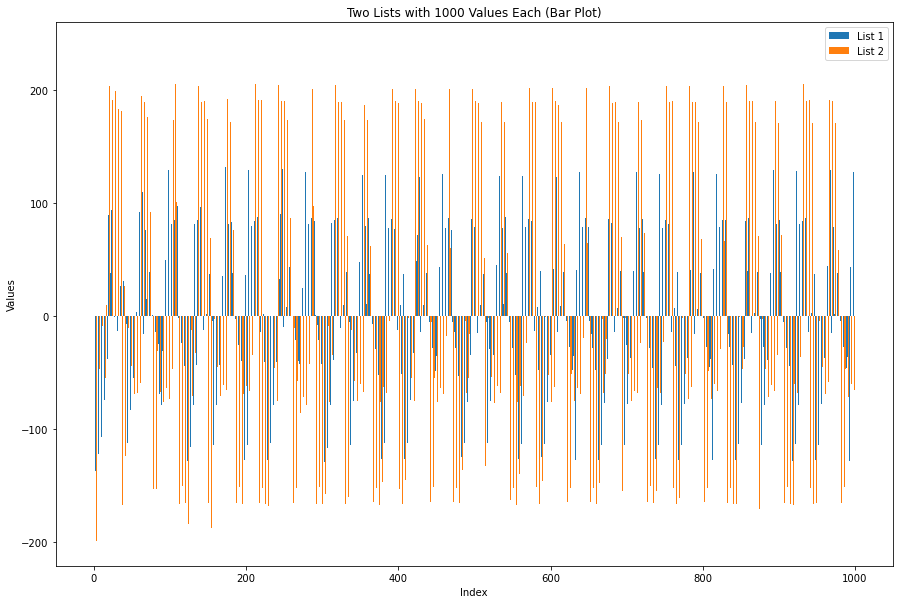

In [44]:
emg1 = """105	-29	-137	15	90	20	-122	112	22	-11	-107	106	-13	-27	-74	79	16	-60	-38	89	37	-130	38	94	0	-116	136	-1	-16	-91	92	-13	-26	-66	75	27	-85	-29	91	31	-125	60	66	-7	-112	127	-13	-22	-83	82	0	-34	-55	81	36	-125	4	95	17	-121	92	31	-12	-103	110	-16	-25	-75	76	15	-54	-43	87	39	-132	29	96	1	-118	133	1	-14	-94	93	-9	-25	-69	75	27	-79	-31	92	36	-127	50	75	-5	-114	129	-10	-20	-82	81	6	-37	-45	85	42	-130	24	97	-2	-117	132	-9	-24	-79	82	7	-44	-42	84	41	-128	31	96	-2	-116	131	-10	-25	-79	81	8	-44	-43	85	40	-128	31	96	-2	-115	131	-12	-24	-78	81	2	-41	-41	83	37	-128	38	95	-4	-114	131	-14	-26	-79	81	2	-41	-43	82	38	-129	35	95	-2	-114	132	-13	-25	-79	81	0	-39	-42	83	38	-127	36	95	-3	-114	131	-15	-26	-80	80	1	-40	-42	84	37	-127	36	95	-3	-114	129	-14	-26	-79	80	2	-41	-42	84	37	-127	39	88	-3	-113	129	-14	-25	-80	80	2	-41	-41	84	39	-127	40	87	-5	-112	127	-15	-24	-79	80	2	-40	-41	84	40	-127	33	90	-1	-115	130	-10	-24	-79	80	8	-43	-42	85	43	-128	31	92	0	-116	129	-9	-21	-82	82	9	-40	-42	86	45	-129	25	88	1	-118	127	-7	-22	-83	81	12	-41	-39	87	48	-128	26	84	1	-118	127	-8	-21	-82	80	13	-42	-39	87	47	-129	30	85	0	-117	129	-9	-24	-79	82	9	-44	-39	85	43	-129	31	87	-3	-116	129	-11	-28	-78	81	10	-50	-33	87	39	-127	40	85	-5	-114	127	-11	-31	-75	80	11	-54	-33	87	37	-125	48	73	-7	-112	125	-12	-30	-74	80	11	-54	-34	87	37	-126	45	78	-7	-114	126	-13	-29	-75	79	10	-52	-34	87	39	-126	43	77	-6	-112	125	-13	-29	-75	78	10	-53	-34	86	37	-125	47	77	-6	-113	125	-12	-30	-75	79	10	-51	-32	87	37	-126	46	76	-5	-112	125	-14	-28	-74	79	11	-51	-33	88	37	-126	49	72	-5	-112	123	-14	-29	-76	79	10	-52	-35	87	38	-126	43	80	-5	-113	125	-14	-28	-75	79	10	-49	-35	87	39	-127	43	80	-5	-113	126	-13	-27	-76	78	10	-49	-36	87	39	-126	44	76	-5	-113	125	-14	-28	-73	79	10	-53	-33	86	38	-125	47	73	-5	-112	124	-15	-27	-76	78	9	-49	-34	86	39	-126	42	79	-4	-114	125	-15	-29	-76	79	10	-50	-31	87	37	-125	48	71	-5	-112	122	-15	-29	-75	78	10	-52	-34	87	38	-126	45	73	-4	-113	124	-15	-28	-77	78	11	-50	-33	88	38	-126	45	74	-5	-113	123	-15	-28	-74	79	10	-52	-33	86	38	-126	44	75	-4	-113	124	-12	-25	-77	79	8	-46	-37	86	40	-127	38	84	-3	-113	126	-13	-27	-77	79	8	-48	-35	86	40	-125	42	77	-4	-113	124	-15	-26	-76	79	8	-50	-34	87	39	-127	42	78	-6	-113	123	-14	-26	-74	79	9	-51	-33	87	39	-126	42	78	-4	-114	126	-14	-27	-76	79	8	-48	-35	86	38	-127	41	79	-4	-114	127	-14	-27	-76	79	8	-49	-35	87	39	-127	41	79	-4	-114	125	-16	-28	-77	79	7	-48	-35	87	39	-127	41	79	-3	-114	126	-14	-28	-77	79	7	-48	-38	86	38	-127	39	82	-3	-113	126	-14	-26	-78	80	7	-47	-37	86	40	-128	40	82	-2	-114	126	-15	-26	-78	78	7	-47	-37	86	38	-127	40	81	-1	-113	127	-14	-28	-77	78	7	-46	-37	86	39	-127	38	83	-2	-114	127	-14	-28	-78	80	7	-46	-37	84	39	-126	40	82	-3	-114	126	-14	-27	-79	78	8	-47	-35	85	39	-127	40	81	-3	-114	127	-14	-26	-78	79	7	-44	-40	86	39	-127	39	84	-4	-114	128	-15	-27	-78	79	6	-46	-37	85	38	-127	41	83	-5	-112	127	-16	-26	-77	80	6	-47	-36	85	38	-128	40	84	-2	-114	128	-14	-27	-79	80	6	-45	-38	85	39	-127	42	83	-5	-113	126	-16	-27	-79	79	5	-45	-36	85	39	-127	41	85	-3	-114	129	-16	-27	-80	80	5	-43	-37	85	39	-127	41	86	-5	-113	128	-14	-27	-77	80	5	-45	-38	84	39	-127	40	87	-4	-113	129	-15	-26	-79	79	3	-44	-38	84	39	-128	39	90	-3	-114	130	-14	-27	-79	80	3	-42	-39	84	39	-128	38	88	-3	-114	129	-14	-28	-80	81	2	-43	-37	85	39	-128	39	89	-5	-114	129	-14	-28	-80	80	3	-44	-38	85	39	-128	41	86	-5	-113	128	-14	-25	-79	81	2	-43	-39	84	39	-128	41	87	-4	-114	128	-14	-27	-79	81	3	-44	-37	86	37	-127	44	86	-6	-114	128	-15	-28	-78	80	3	-46	-37	84	38	-127	44	86	-5	-113	129	-15	-28	-78	79	2	-45	-36	84	38	-129	46	84	-4	-112	128	-16	-27	-76	80	4	-46	-36	85	39	-128	43	85	-5	-112	127	-14
"""
emg2 = """85	238	46	-199	-52	204	-120	-47	-51	195	-161	-9	-67	185	-158	-55	10	174	-166	-71	203	77	-183	-66	191	-160	-32	-70	199	-153	-27	-69	183	-162	-65	86	181	-167	-69	196	27	-124	-57	192	-164	-11	-66	194	-153	-44	-55	176	-164	-69	181	141	-174	-68	192	-46	-70	-59	195	-158	-14	-68	189	-156	-57	0	176	-167	-72	204	92	-182	-64	190	-153	-34	-71	199	-153	-31	-69	185	-161	-67	68	179	-167	-76	197	47	-140	-64	190	-165	-14	-73	192	-152	-55	-47	173	-166	-79	205	101	-182	-66	188	-166	-11	-72	189	-150	-57	-34	175	-165	-80	203	86	-184	-66	190	-165	-12	-71	190	-151	-57	-33	175	-165	-78	203	86	-184	-66	189	-166	-7	-68	190	-152	-47	-36	174	-165	-70	205	69	-187	-60	190	-165	-3	-64	191	-151	-45	-39	174	-166	-71	205	76	-187	-61	190	-166	-5	-65	192	-151	-42	-43	172	-166	-70	205	76	-186	-61	189	-165	-3	-63	193	-151	-45	-41	174	-166	-69	206	72	-187	-62	190	-164	-3	-66	192	-151	-43	-34	175	-166	-68	205	68	-173	-60	191	-165	-4	-66	191	-152	-46	-37	173	-166	-72	204	66	-168	-59	190	-164	0	-67	190	-151	-46	-39	173	-166	-75	204	78	-172	-66	190	-166	-8	-72	190	-151	-55	-35	173	-165	-81	204	87	-172	-69	188	-165	-11	-77	190	-152	-57	-44	172	-166	-86	203	96	-160	-72	189	-166	-14	-79	190	-150	-61	-42	171	-166	-91	201	97	-150	-73	188	-166	-10	-81	189	-151	-64	-40	171	-166	-89	201	89	-157	-74	189	-165	-9	-76	188	-152	-56	-34	173	-165	-81	204	91	-162	-68	189	-166	-10	-71	189	-151	-57	-18	173	-166	-78	202	71	-160	-63	190	-164	-12	-67	188	-152	-57	-6	173	-166	-75	201	56	-140	-60	190	-164	-9	-67	187	-153	-56	-6	173	-166	-75	201	62	-148	-62	189	-164	-6	-68	189	-152	-55	-13	172	-167	-76	202	61	-147	-63	189	-164	-5	-68	187	-152	-54	-4	174	-166	-74	201	58	-147	-63	190	-164	-6	-65	188	-153	-54	-11	172	-166	-73	202	55	-145	-65	189	-163	-2	-67	187	-152	-55	-10	173	-167	-75	201	52	-135	-60	190	-164	-4	-66	188	-152	-56	-7	174	-166	-76	201	63	-151	-63	189	-164	-5	-68	188	-151	-55	-16	173	-167	-76	201	63	-152	-64	189	-164	-2	-69	188	-153	-54	-18	173	-167	-76	201	60	-146	-65	189	-164	-2	-69	188	-152	-55	-5	173	-165	-75	200	56	-136	-62	190	-163	-4	-68	188	-151	-55	-16	172	-167	-76	201	63	-149	-65	190	-163	-1	-67	188	-151	-55	-12	172	-167	-75	200	51	-133	-63	190	-162	-2	-67	188	-154	-54	-7	173	-166	-77	201	56	-136	-62	190	-163	-2	-68	189	-152	-55	-10	172	-168	-75	201	56	-138	-61	189	-163	-2	-69	189	-152	-54	-8	172	-167	-76	201	59	-140	-62	190	-163	-7	-71	189	-152	-51	-24	172	-166	-76	202	70	-159	-64	189	-163	-3	-69	189	-151	-53	-19	172	-166	-77	201	62	-146	-63	190	-163	-1	-70	188	-152	-52	-16	172	-166	-76	202	63	-148	-63	190	-163	-3	-71	187	-152	-53	-12	172	-166	-76	202	64	-148	-65	190	-164	-3	-69	188	-152	-51	-19	172	-166	-75	203	67	-152	-64	190	-164	-2	-69	188	-151	-52	-19	172	-166	-76	202	65	-148	-62	189	-164	0	-68	189	-152	-50	-17	173	-166	-75	203	67	-148	-66	190	-164	-3	-68	188	-152	-51	-20	174	-166	-75	203	69	-156	-67	188	-164	-3	-70	189	-151	-50	-23	172	-166	-76	203	70	-155	-64	189	-164	-2	-70	189	-151	-51	-23	172	-166	-75	203	69	-155	-66	188	-164	-2	-68	189	-151	-51	-24	173	-166	-75	202	73	-158	-65	189	-164	-3	-68	189	-150	-52	-24	173	-165	-74	203	70	-155	-64	190	-163	-2	-68	190	-151	-52	-23	172	-165	-74	203	69	-155	-63	189	-164	-3	-69	190	-152	-51	-30	173	-166	-73	203	73	-161	-63	189	-164	-2	-69	190	-151	-51	-24	172	-165	-73	203	67	-159	-63	189	-164	-1	-68	189	-151	-49	-23	172	-165	-73	203	68	-161	-65	189	-164	-2	-67	191	-152	-49	-29	172	-166	-73	203	64	-159	-60	190	-164	0	-66	191	-151	-47	-29	172	-167	-74	203	66	-165	-62	189	-165	-1	-67	191	-152	-47	-33	171	-166	-73	204	67	-166	-62	189	-165	-1	-66	190	-152	-47	-27	173	-166	-73	204	68	-167	-62	190	-165	-1	-67	190	-151	-47	-31	172	-166	-73	205	71	-171	-61	190	-166	-3	-66	191	-151	-47	-37	172	-165	-72	205	73	-170	-61	190	-165	-2	-66	190	-152	-45	-34	171	-167	-73	205	72	-171	-59	190	-165	-2	-67	190	-151	-47	-35	171	-166	-71	205	68	-167	-60	189	-165	-4	-68	190	-152	-45	-36	172	-166	-71	205	70	-168	-59	190	-165	-4	-65	191	-152	-45	-31	171	-166	-70	204	61	-165	-57	190	-165	-4	-63	192	-151	-45	-29	172	-166	-69	205	61	-167	-58	191	-165	-1	-64	190	-151	-43	-27	171	-166	-70	205	58	-163	-62	190	-165	0	-64	190	-151	-47	-27	172	-167	-72	205	63	-164	-60	190	-164	-5	-65
"""
list1 = [int(val) for val in emg1.split()]
list2 = [int(val) for val in emg2.split()]

x = list(range(1000))

# Create a figure and axis with an increased size (e.g., 10 inches by 6 inches)
plt.figure(figsize=(15, 10))

# Plot the two lists as bar plots side by side
plt.bar(x, list1, width=0.4, align='center', label='List 1')
plt.bar([i + 0.4 for i in x], list2, width=0.4, align='center', label='List 2')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Two Lists with 1000 Values Each (Bar Plot)')
plt.legend()

# Display the plot
plt.show()

In [27]:
df = pd.read_csv("C:/project/DRDO/ML_gui_v2/Ashok@49yr_2-9-22_MI_LH.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,label,EMG
0,105,-29,-137,15,90,20,-122,112,22,-11,...,39,-128,43,85,-5,-112,127,-14,cylindrical,EMG1
1,-29,-76,79,10,-59,-25,89,32,-121,73,...,-100,95,2,-33,-49,84,44,-131,cylindrical,EMG1
2,21,97,-5,-117,124,-8,-34,-65,81,27,...,-8,-27,-76,79,15,-61,-26,90,cylindrical,EMG1
3,34,-122,68,36,-14,-105,100,-3,-34,-51,...,-115,122,-9,-37,-65,81,27,-93,cylindrical,EMG1
4,-11,94,18,-121,109,11,-26,-89,87,8,...,59,-13,-109,109,-4,-38,-56,83,cylindrical,EMG1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-85,-68,100,45,-100,-9,112,-13,-120,55,...,126,-82,-106,102,58,-111,-20,123,tip,EMG3
536,2,-126,47,127,-78,-114,99,68,-112,-27,...,46,-114,-8,124,-21,-133,65,123,tip,EMG3
537,-90,-86,109,52,-113,-14,125,-12,-129,62,...,-31,-134,84,100,-108,-43,113,32,tip,EMG3
538,-119,1,135,-22,-142,89,88,-83,-56,93,...,-100,-15,118,-21,-135,56,130,-89,tip,EMG3


In [44]:
df_cylindrical_emg1 = df[(df['EMG'] == "EMG1") & (df['label'] == "cylindrical")]
df_cylindrical_emg1 = df_cylindrical_emg1.drop(columns=["label","EMG"], axis=1)
df1_reset = df_cylindrical_emg1.reset_index(drop=True)

df_cylindrical_emg2 = df[(df['EMG'] == "EMG2") & (df['label'] == "cylindrical")]
df_cylindrical_emg2 = df_cylindrical_emg2.drop(columns=["label","EMG"], axis=1)
df2_reset = df_cylindrical_emg2.reset_index(drop=True)

df_cylindrical_emg3 = df[(df['EMG'] == "EMG3") & (df['label'] == "cylindrical")]
df_cylindrical_emg3 = df_cylindrical_emg3.drop(columns=["EMG"], axis=1)
df3_reset = df_cylindrical_emg3.reset_index(drop=True)

dfs_to_combine = [df1_reset, df2_reset, df3_reset]

combined_df = pd.concat(dfs_to_combine, axis=1)
combined_df.columns = list(range(3000)) + ['label']

combined_df


,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,label
0,105,-29,-137,15,90,20,-122,112,22,-11,...,-97,-85,112,20,-113,71,45,29,-110,cylindrical
1,-29,-76,79,10,-59,-25,89,32,-121,73,...,93,51,56,-102,122,41,-94,-115,119,cylindrical
2,21,97,-5,-117,124,-8,-34,-65,81,27,...,32,-111,115,46,8,-117,120,27,-101,cylindrical
3,34,-122,68,36,-14,-105,100,-3,-34,-51,...,72,52,41,-109,120,48,-38,-132,115,cylindrical
4,-11,94,18,-121,109,11,-26,-89,87,8,...,22,-112,79,50,49,-105,122,44,-83,cylindrical
5,36,-126,9,96,0,-120,133,-2,-29,-76,...,125,34,-97,-104,125,20,-114,70,52,cylindrical
6,129,-10,-41,-66,79,18,-88,-13,90,20,...,-114,76,43,37,-108,121,37,-65,-118,cylindrical
7,-114,12,93,2,-118,137,-4,-31,-78,81,...,22,-104,-21,66,20,-113,92,46,44,cylindrical
8,-2,-42,-48,84,37,-133,27,90,-7,-114,...,-101,113,24,-114,73,51,33,-111,118,cylindrical
9,-66,79,21,-90,-10,91,13,-118,116,7,...,-102,-56,106,16,-116,82,47,30,-109,cylindrical


In [51]:
def process_emg(df, emg_value, label_value):
    df_emg = df[(df['EMG'] == emg_value) & (df['label'] == label_value)]
    df_emg = df_emg.drop(columns=["label", "EMG"], axis=1)
    df_reset = df_emg.reset_index(drop=True)
    return df_reset

labels = ['cylindrical', 'hook', 'lateral', 'palmar', 'spherical', 'tip']
emg_values = ['EMG1', 'EMG2', 'EMG3']

final_dfs = []

for label_value in labels:
    dfs_to_combine = []

    for emg_value in emg_values:
        df_reset = process_emg(df, emg_value, label_value)
        dfs_to_combine.append(df_reset)

    combined_df = pd.concat(dfs_to_combine, axis=1)
    combined_df.columns = list(range(3000))
    combined_df['label'] = label_value
    
    final_dfs.append(combined_df)

final_combined_df = pd.concat(final_dfs, ignore_index=True)
print(final_combined_df.shape)  # Should be (180, 3000)
final_combined_df

(180, 3001)


,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,label
0,105,-29,-137,15,90,20,-122,112,22,-11,...,-97,-85,112,20,-113,71,45,29,-110,cylindrical
1,-29,-76,79,10,-59,-25,89,32,-121,73,...,93,51,56,-102,122,41,-94,-115,119,cylindrical
2,21,97,-5,-117,124,-8,-34,-65,81,27,...,32,-111,115,46,8,-117,120,27,-101,cylindrical
3,34,-122,68,36,-14,-105,100,-3,-34,-51,...,72,52,41,-109,120,48,-38,-132,115,cylindrical
4,-11,94,18,-121,109,11,-26,-89,87,8,...,22,-112,79,50,49,-105,122,44,-83,cylindrical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,83,36,-98,0,84,-19,-73,30,68,-46,...,55,126,-82,-106,102,58,-111,-20,123,tip
176,32,72,-40,-76,73,62,-97,-35,99,-8,...,110,46,-114,-8,124,-21,-133,65,123,tip
177,87,47,-106,-9,91,-20,-82,33,72,-51,...,118,-31,-134,84,100,-108,-43,113,32,tip
178,98,-17,-80,23,80,-93,-75,68,7,-103,...,51,-100,-15,118,-21,-135,56,130,-89,tip


In [52]:
label_counts = final_combined_df['label'].value_counts()
print(label_counts)


cylindrical    30
hook           30
lateral        30
palmar         30
spherical      30
tip            30
Name: label, dtype: int64


In [53]:
final_combined_df.to_csv('Ashok_transformed_3000.csv', index=False)  # Set index=False to exclude row numbers
